Dataset: https://www.kaggle.com/datasets/thegoanpanda/brain-tumor-stage-based-recurrence-patterns

# Import Libraries and Read Data

In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

data = pd.read_csv("BrainTumor.csv")

Take a look at the values of the dataset.

In [72]:
data.head()

,Patient ID,Age,Gender,Tumor Type,Tumor Grade,Tumor Location,Treatment,Treatment Outcome,Time to Recurrence (months),Recurrence Site,Survival Time (months)
0,1,45,Male,Glioblastoma,IV,Frontal lobe,Surgery,Partial response,10.0,Temporal lobe,18
1,2,55,Female,Meningioma,I,Parietal lobe,Surgery,Complete response,NaN,NaN,36
2,3,60,Male,Astrocytoma,III,Occipital lobe,Surgery + Chemotherapy,Progressive disease,14.0,Frontal lobe,22
3,4,50,Female,Glioblastoma,IV,Temporal lobe,Surgery + Radiation therapy,Complete response,NaN,NaN,12
4,5,65,Male,Astrocytoma,II,Frontal lobe,Surgery + Radiation therapy,Partial response,24.0,Frontal lobe,48


In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Patient ID                   2000 non-null   int64  
 1   Age                          2000 non-null   int64  
 2   Gender                       2000 non-null   object 
 3   Tumor Type                   2000 non-null   object 
 4   Tumor Grade                  2000 non-null   object 
 5   Tumor Location               2000 non-null   object 
 6   Treatment                    2000 non-null   object 
 7   Treatment Outcome            2000 non-null   object 
 8   Time to Recurrence (months)  1438 non-null   float64
 9   Recurrence Site              1438 non-null   object 
 10  Survival Time (months)       2000 non-null   int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 172.0+ KB


Fill null values of `'Recurrence Site` column with `Never` value to show that patient never come back.

In [74]:
data["Recurrence Site"].fillna("Never", inplace=True)

# Plot Information from Dataset

The Distribution of `Age` of Patients

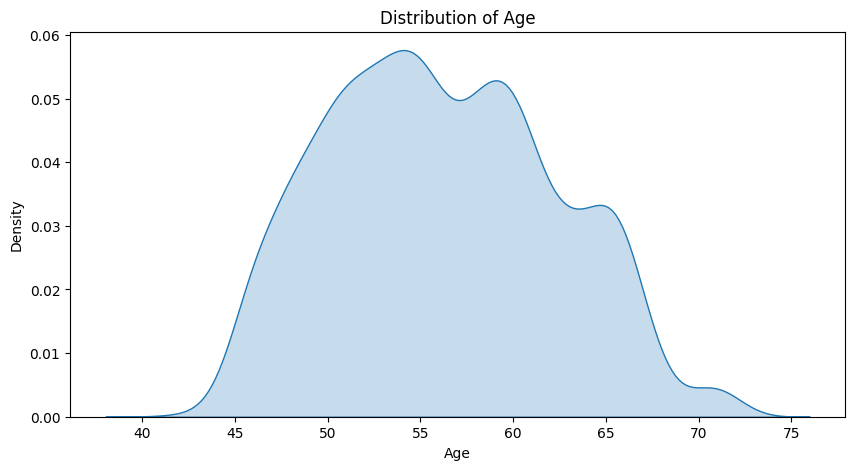

In [75]:
plt.figure(figsize=(10, 5))

sns.kdeplot(data["Age"], fill=True)

plt.title("Distribution of Age")

plt.show()


The Pie Chart of the Distribution of `Tumor Types`

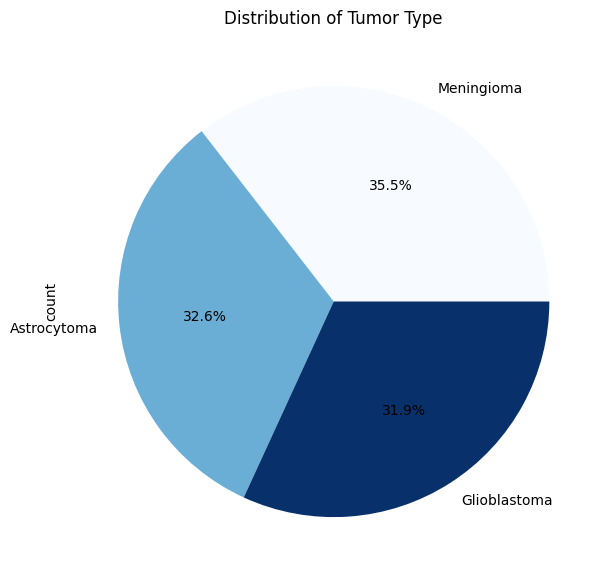

In [76]:
plt.figure(figsize=(25, 7))

data["Tumor Type"].value_counts().plot(kind="pie", autopct="%1.1f%%", colormap="Blues")

plt.title("Distribution of Tumor Type")

plt.show()

The Pie Chart of the Distribution of `Recurrence Site`

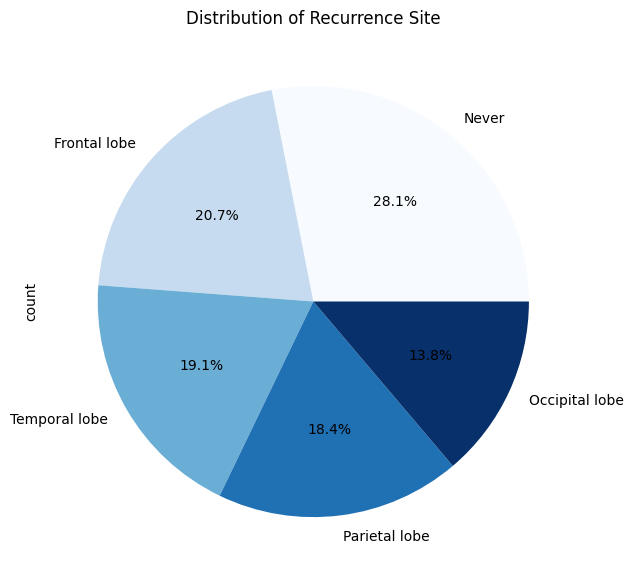

In [77]:
plt.figure(figsize=(25, 7))

data["Recurrence Site"].value_counts().plot(
    kind="pie", autopct="%1.1f%%", colormap="Blues"
)

plt.title("Distribution of Recurrence Site")

plt.show()

The Bar Chart Relationship between `Gender` and `Survival Time`

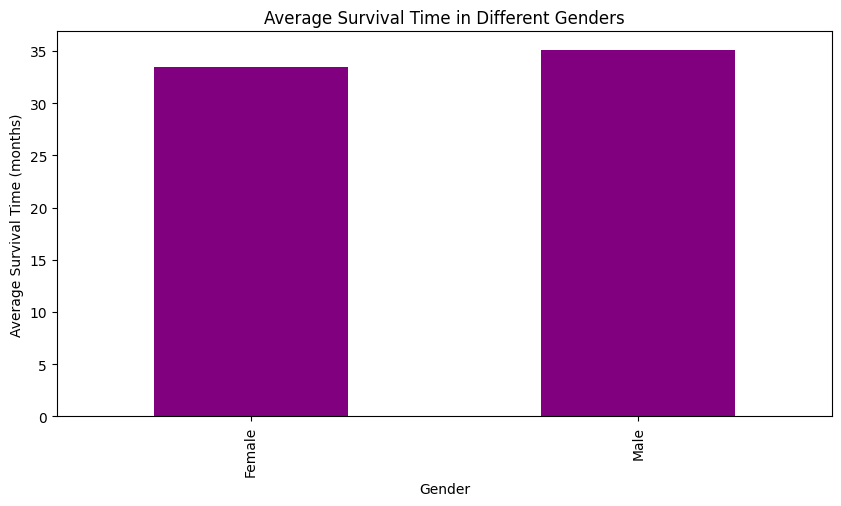

In [78]:
plt.figure(figsize=(10, 5))

data.groupby("Gender")["Survival Time (months)"].mean().plot(kind="bar", color="purple")

plt.title("Average Survival Time in Different Genders")
plt.xlabel("Gender")
plt.ylabel("Average Survival Time (months)")

plt.show()

The Bar Chart Relationship between `Tumor Type` and `Survival Time`

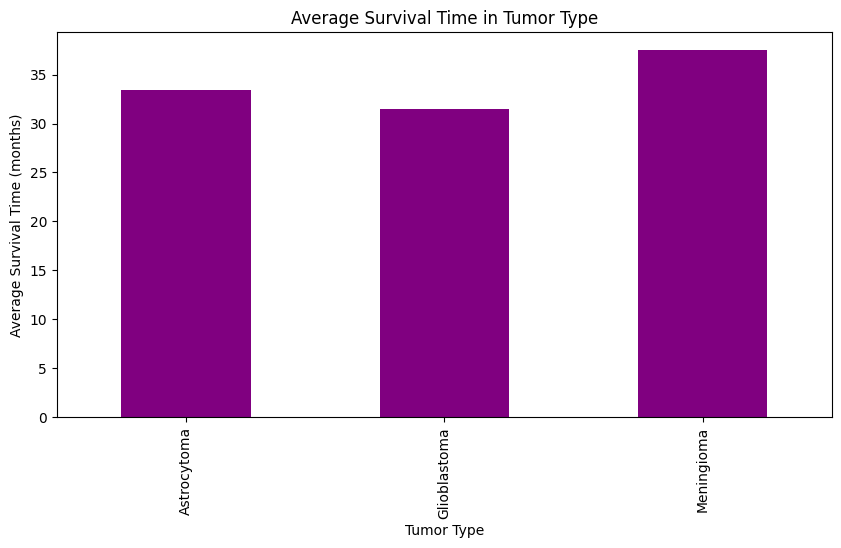

In [79]:
plt.figure(figsize=(10, 5))

data.groupby("Tumor Type")["Survival Time (months)"].mean().plot(kind="bar", color="purple")

plt.title("Average Survival Time in Tumor Type")
plt.xlabel("Tumor Type")
plt.ylabel("Average Survival Time (months)")

plt.show()

The Bar Chart Relationship between `Tumor Grade` and `Survival Time`

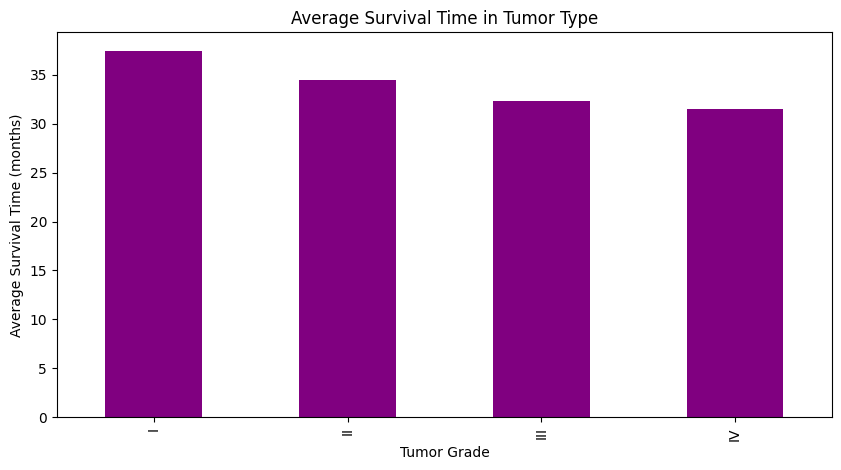

In [80]:
plt.figure(figsize=(10, 5))

data.groupby("Tumor Grade")["Survival Time (months)"].mean().plot(
    kind="bar", color="purple"
)

plt.title("Average Survival Time in Tumor Type")
plt.xlabel("Tumor Grade")
plt.ylabel("Average Survival Time (months)")

plt.show()

The Bar Chart Relationship between `Treatment` and `Survival Time`

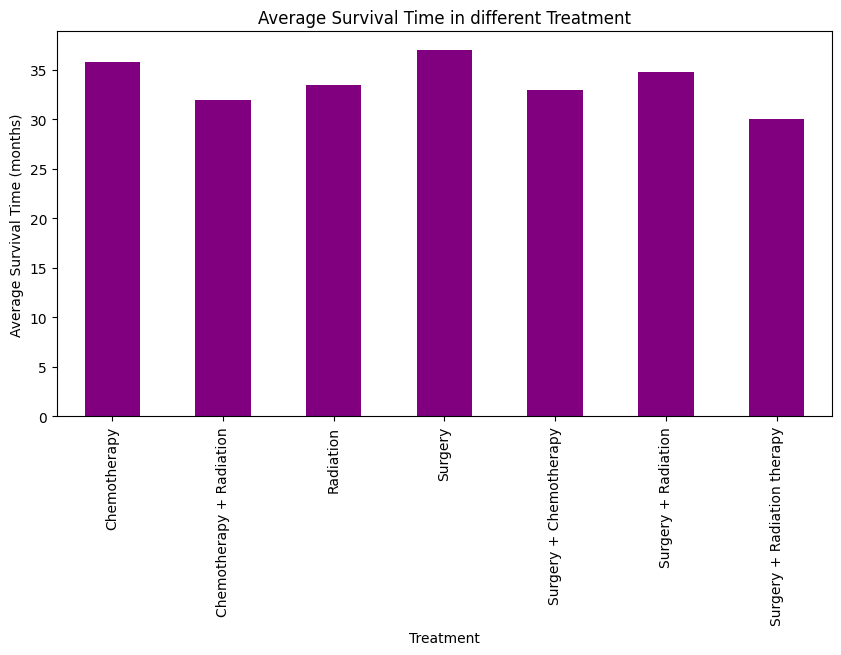

In [81]:
plt.figure(figsize=(10, 5))

data.groupby("Treatment")["Survival Time (months)"].mean().plot(
    kind="bar", color="purple"
)

plt.title("Average Survival Time in different Treatment")
plt.xlabel("Treatment")
plt.ylabel("Average Survival Time (months)")
plt.show()

The Bar Chart of the Relationship between `Gender` and `Tumor Grade`

<Figure size 2500x700 with 0 Axes>

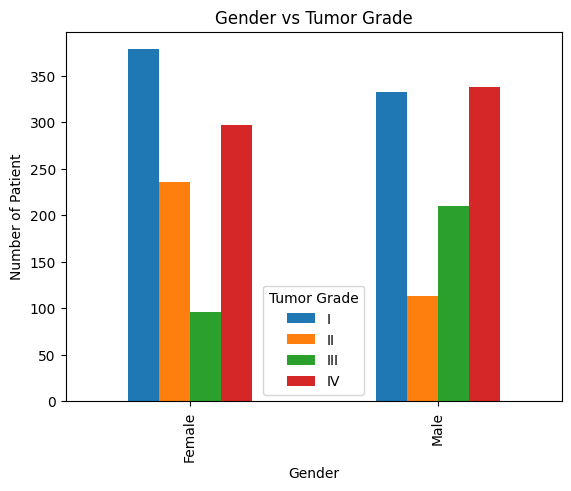

In [82]:
plt.figure(figsize=(25, 7))

data.groupby("Gender")["Tumor Grade"].value_counts().unstack().plot(kind="bar")

plt.title("Gender vs Tumor Grade")

plt.xlabel("Gender")
plt.ylabel("Number of Patient")

plt.show()

In [83]:
data.groupby("Treatment")["Treatment Outcome"].value_counts()

Treatment                    Treatment Outcome  
Chemotherapy                 Stable disease          54
                             Complete response       31
                             Progressive disease     30
                             Partial response         8
Chemotherapy + Radiation     Progressive disease      2
Radiation                    Progressive disease     32
                             Stable disease          28
                             Complete response        9
                             Partial response         4
Surgery                      Complete response       78
                             Progressive disease     39
                             Partial response        14
                             Stable disease           8
Surgery + Chemotherapy       Stable disease         288
                             Complete response      201
                             Partial response       167
                             Progressive disease    123

The Bar Chart of the Relationship between `Treatment` and `Treatment Outcome`

<Figure size 1000x500 with 0 Axes>

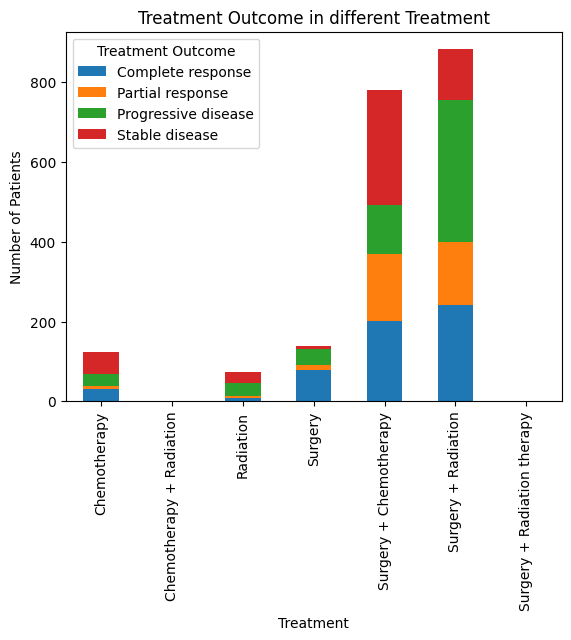

In [84]:
plt.figure(figsize=(10, 5))

data.groupby("Treatment")["Treatment Outcome"].value_counts().unstack().plot(
    kind="bar", stacked=True
)

plt.title("Treatment Outcome in different Treatment")
plt.xlabel("Treatment")
plt.ylabel("Number of Patients")
plt.show()

<Figure size 1000x500 with 0 Axes>

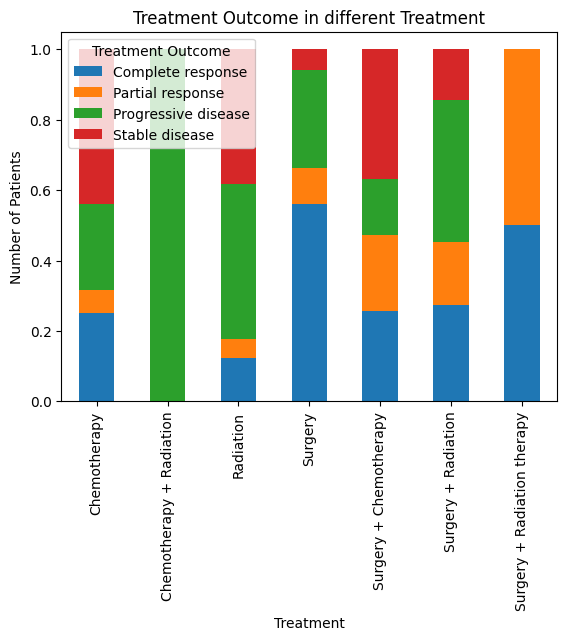

In [85]:
plt.figure(figsize=(10, 5))

data.groupby("Treatment")["Treatment Outcome"].value_counts(normalize=True).unstack().plot(
    kind="bar", stacked=True
)

plt.title("Treatment Outcome in different Treatment")
plt.xlabel("Treatment")
plt.ylabel("Number of Patients")
plt.show()

The `Treatment Outcomes` relation to `Survival Time`.

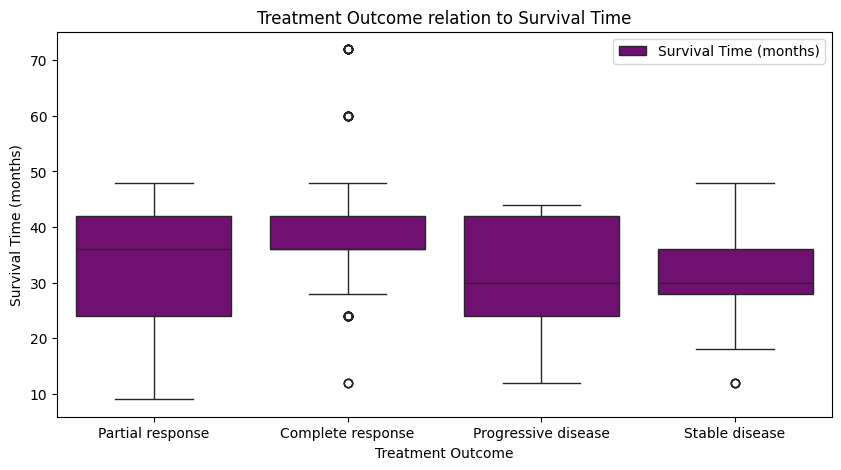

In [86]:
plt.figure(figsize=(10, 5))

sns.boxplot(x=data["Treatment Outcome"], y=data["Survival Time (months)"], label="Survival Time (months)", color='purple')

plt.title("Treatment Outcome relation to Survival Time")

plt.show()

# Preprocessing

Drop unrelated columns to the target value from the dataset.

In [87]:
data.drop(columns=["Patient ID"], inplace=True)

Fill null values of `Time to Recurrence (months)` column with 0 which means patient never come back.

In [88]:
data["Time to Recurrence (months)"].describe()

count    1438.000000
mean       16.099444
std         3.128291
min         6.000000
25%        14.000000
50%        16.000000
75%        18.000000
max        36.000000
Name: Time to Recurrence (months), dtype: float64

In [89]:
data["Time to Recurrence (months)"].fillna(0, inplace=True)

Use label and one-hot encoder to transform categorical values to numerical.

In [90]:
data = pd.get_dummies(
    data,
    columns=[
        "Tumor Type",
        "Tumor Location",
        "Treatment",
        "Treatment Outcome",
        "Recurrence Site",
    ],
)

In [91]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data["Gender"] = le.fit_transform(data["Gender"])
data["Tumor Grade"] = le.fit_transform(data["Tumor Grade"])

Draw correlation matrix to find the relation of each feature with the target value.

<Axes: >

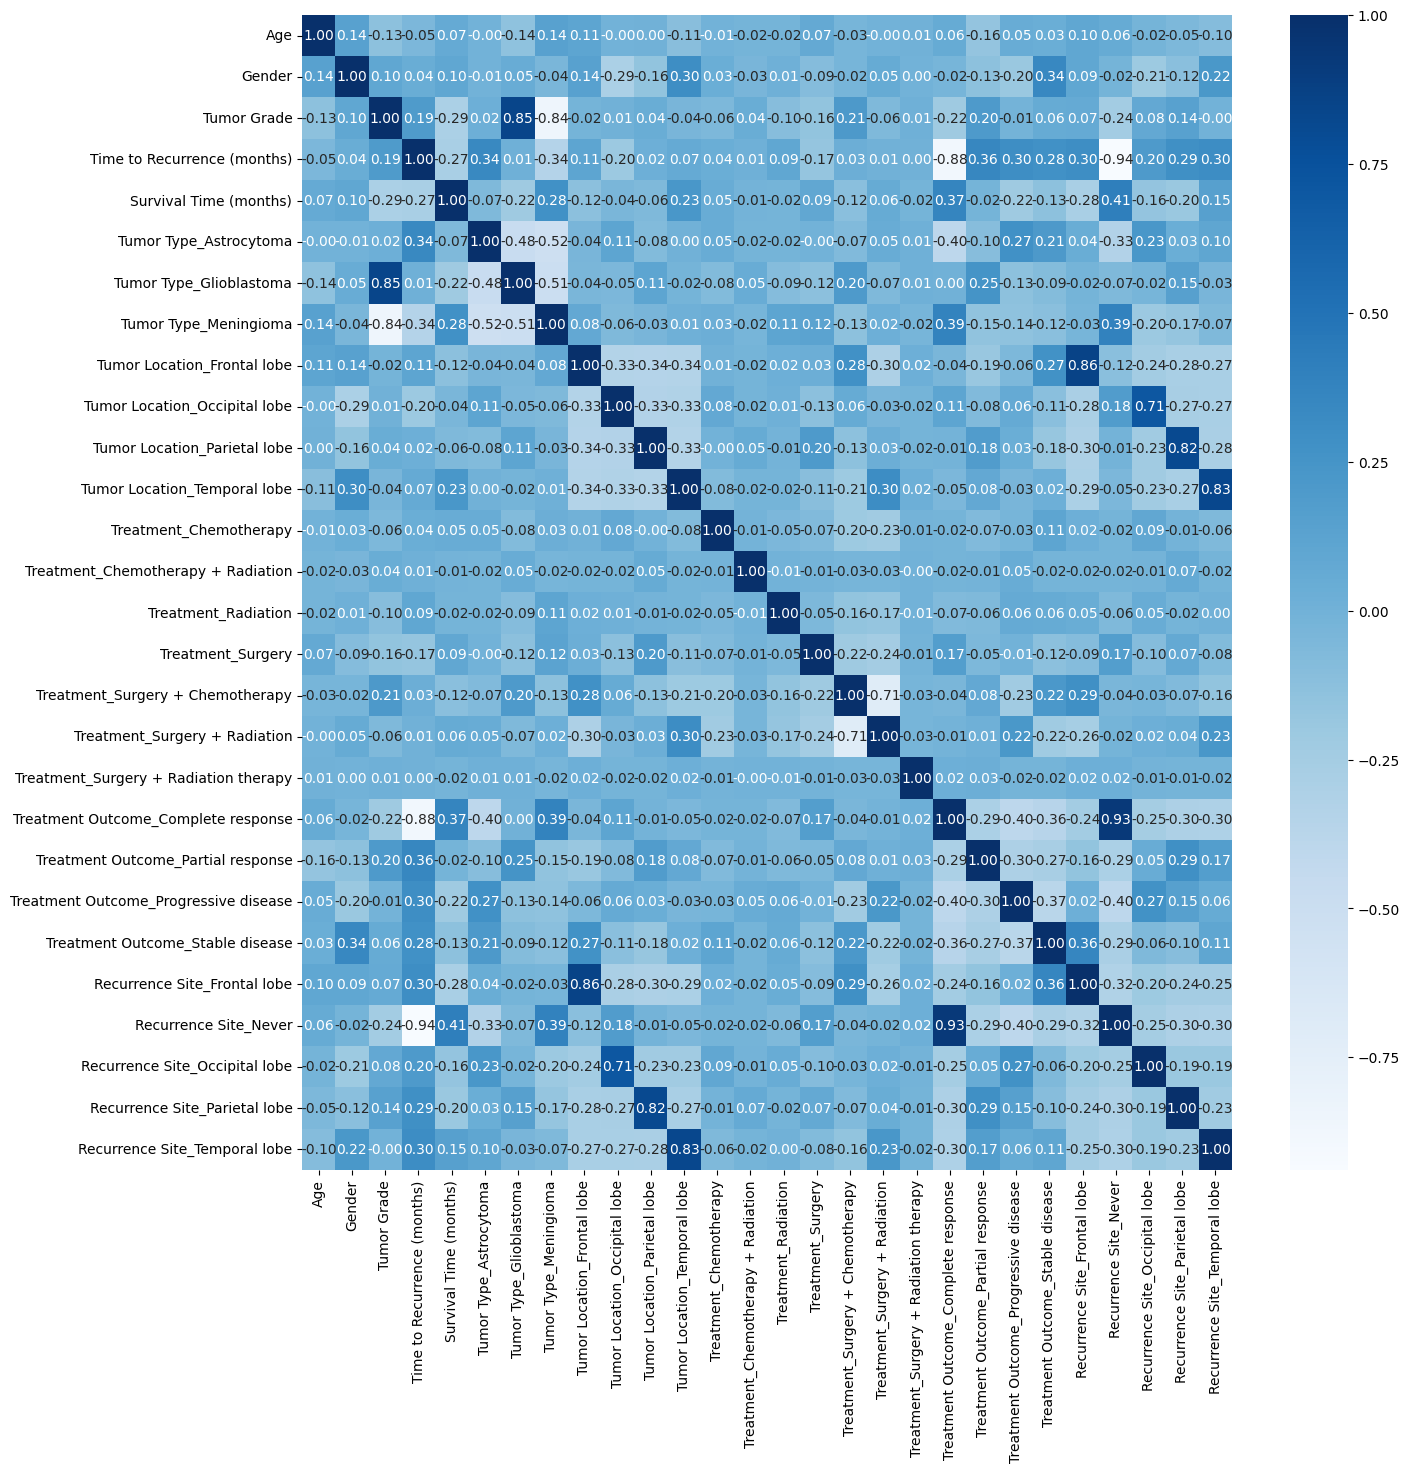

In [92]:
from seaborn import heatmap
from matplotlib import pyplot as plt

plt.figure(figsize=(15, 15))

heatmap(data.corr(), annot=True, fmt=".2f", cmap="Blues")

Scale the features with wide range of values.

In [93]:
data.describe()

,Age,Gender,Tumor Grade,Time to Recurrence (months),Survival Time (months)
count,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000
mean,56.153000,0.496500,1.43300,11.575500,34.270000
std,6.078492,0.500113,1.26147,7.708957,8.606343
min,42.000000,0.000000,0.00000,0.000000,9.000000
25%,51.000000,0.000000,0.00000,0.000000,28.000000
50%,56.000000,0.000000,1.00000,14.000000,36.000000
75%,61.000000,1.000000,3.00000,18.000000,42.000000
max,72.000000,1.000000,3.00000,36.000000,72.000000


In [94]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data["Age"] = scaler.fit_transform(data["Age"].values.reshape(-1, 1))

data["Time to Recurrence (months)"] = scaler.fit_transform(
    data["Time to Recurrence (months)"].values.reshape(-1, 1)
)

data["Survival Time (months)"] = scaler.fit_transform(
    data["Survival Time (months)"].values.reshape(-1, 1)
)

Seperate the train and test parts of the dataset.

In [95]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(columns=["Survival Time (months)"]),
    data["Survival Time (months)"],
    test_size=0.2,
    random_state=42,
)

# Linear Regression

Define the model.

In [96]:
from sklearn.linear_model import LinearRegression

lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, y_train)

LinearRegression()

Evaluate the performance of the model.

In [97]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

lin_reg_y_pred = lin_reg_model.predict(X_test)

lin_reg_mse = mean_squared_error(y_test, lin_reg_y_pred)
print("Mean Squared Error:", lin_reg_mse)
lin_reg_rmse = lin_reg_mse**0.5
print("Root Mean Squared Error:", lin_reg_rmse)
lin_reg_r2 = r2_score(y_test, lin_reg_y_pred)
print("R2 Score:", lin_reg_r2)
lin_reg_mae = mean_absolute_error(y_test, lin_reg_y_pred)
print("Mean Absolute Error:", lin_reg_mae)

Mean Squared Error: 0.6411591803134792
Root Mean Squared Error: 0.8007241599411618
R2 Score: 0.37783223968880675
Mean Absolute Error: 0.614430831450786


The Scatter Plot of the Actual and Predicted `Survival Time` with the Best Fit Line

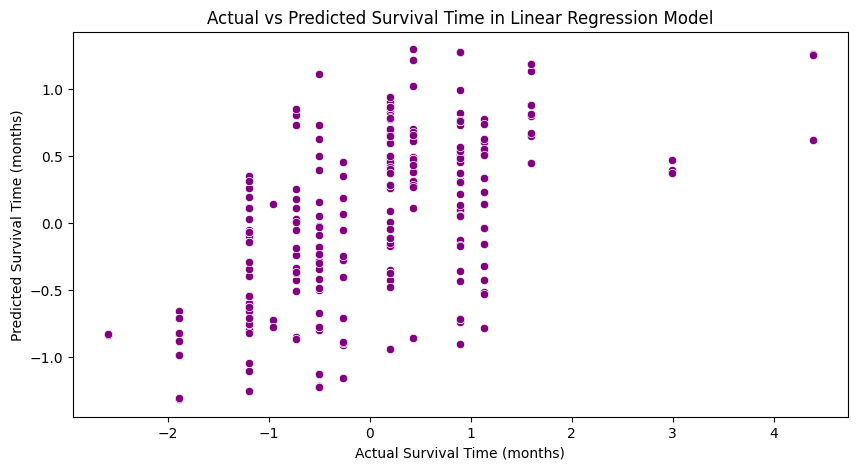

In [98]:
plt.figure(figsize=(10, 5))

sns.scatterplot(x=y_test, y=lin_reg_y_pred, color="purple")

plt.title("Actual vs Predicted Survival Time in Linear Regression Model")

plt.xlabel("Actual Survival Time (months)")
plt.ylabel("Predicted Survival Time (months)")

plt.show()

The Feature Coefficients Plot

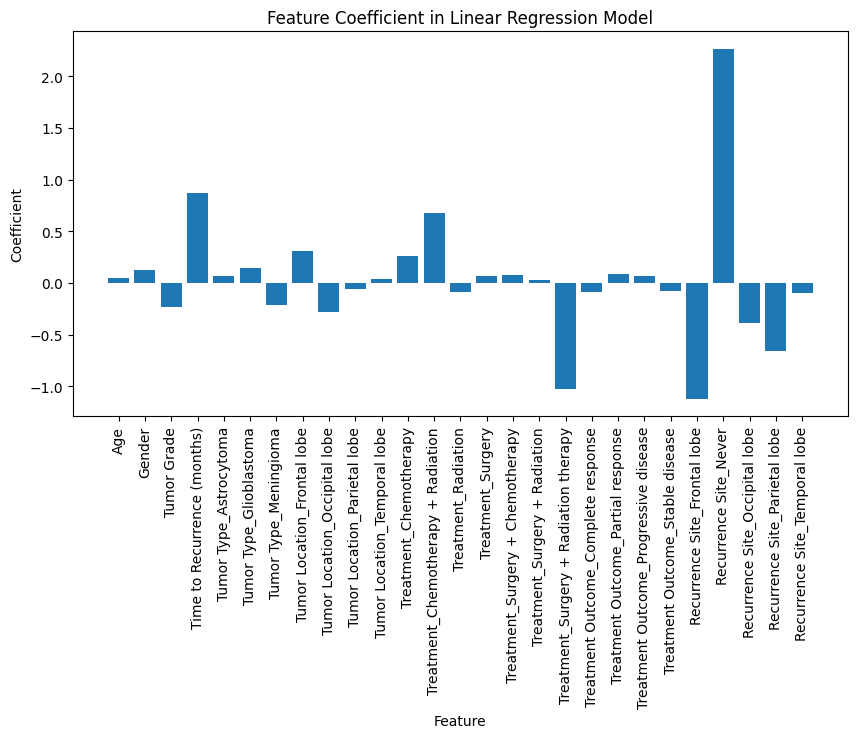

In [99]:
plt.figure(figsize=(10, 5))

plt.bar(X_train.columns, lin_reg_model.coef_)
plt.xticks(rotation=90)
plt.title("Feature Coefficient in Linear Regression Model")
plt.xlabel("Feature")
plt.ylabel("Coefficient")

plt.show()

Density Plot of the Error

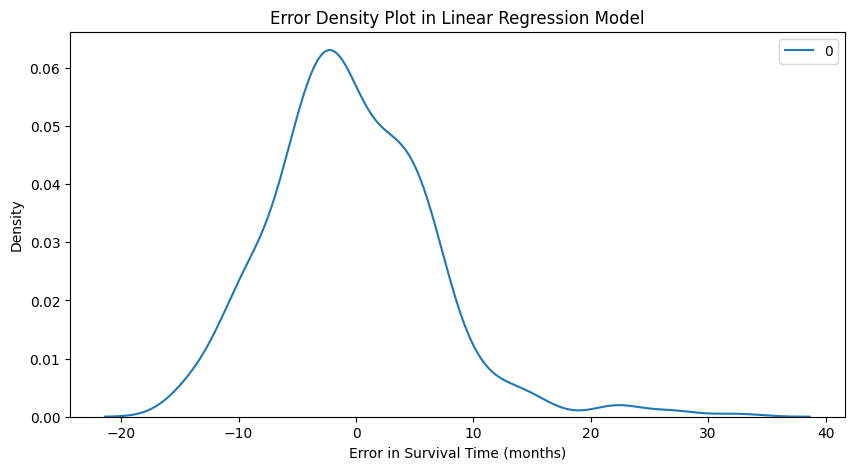

In [100]:
plt.figure(figsize=(10, 5))

sns.kdeplot(
    scaler.inverse_transform(y_test.values.reshape(-1, 1))
    - scaler.inverse_transform(lin_reg_y_pred.reshape(-1, 1))
)

plt.title("Error Density Plot in Linear Regression Model")

plt.xlabel("Error in Survival Time (months)")
plt.ylabel("Density")

plt.show()

Density Plot for `Survival Time` and **Predicted** `Survival Time` for the Test Data

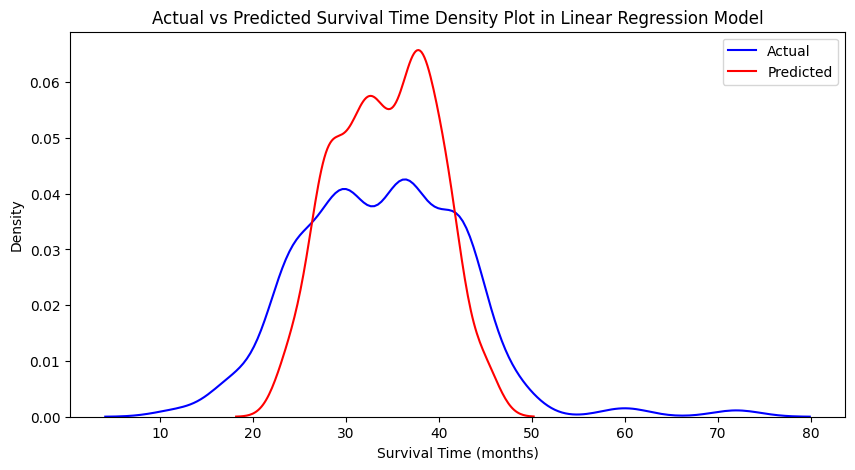

In [101]:
plt.figure(figsize=(10, 5))

sns.kdeplot(
    scaler.inverse_transform(y_test.values.reshape(-1, 1)).flatten(),
    color="blue",
    label="Actual",
)
sns.kdeplot(
    scaler.inverse_transform(lin_reg_y_pred.reshape(-1, 1)).flatten(),
    color="red",
    label="Predicted",
)

plt.title("Actual vs Predicted Survival Time Density Plot in Linear Regression Model")

plt.xlabel("Survival Time (months)")
plt.ylabel("Density")

plt.legend()

plt.show()

The Density Plot for `Survival Time` in Train and Test Actual and Predicted data

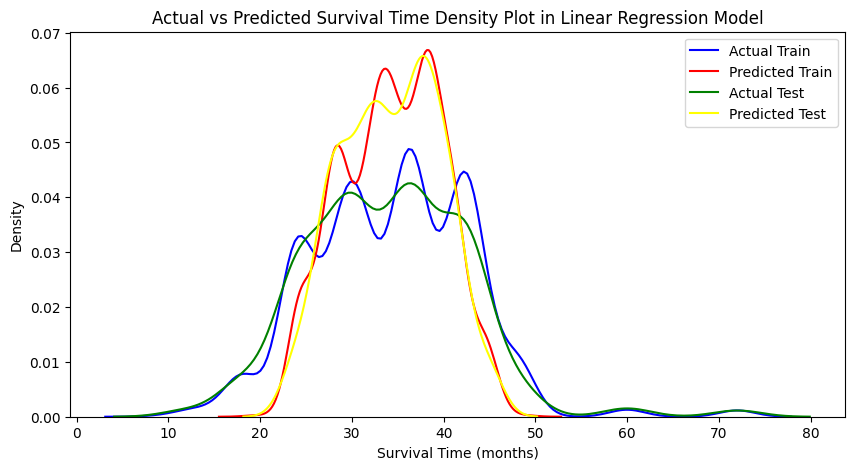

In [102]:
lin_reg_y_train_pred = lin_reg_model.predict(X_train)

plt.figure(figsize=(10, 5))

sns.kdeplot(
    scaler.inverse_transform(y_train.values.reshape(-1, 1)).flatten(),
    color="blue",
    label="Actual Train",
)
sns.kdeplot(
    scaler.inverse_transform(lin_reg_y_train_pred.reshape(-1, 1)).flatten(),
    color="red",
    label="Predicted Train",
)
sns.kdeplot(
    scaler.inverse_transform(y_test.values.reshape(-1, 1)).flatten(),
    color="green",
    label="Actual Test",
)
sns.kdeplot(
    scaler.inverse_transform(lin_reg_y_pred.reshape(-1, 1)).flatten(),
    color="yellow",
    label="Predicted Test",
)

plt.title("Actual vs Predicted Survival Time Density Plot in Linear Regression Model")

plt.xlabel("Survival Time (months)")
plt.ylabel("Density")

plt.legend()

plt.show()

# Decision Tree

Define the model.

In [103]:
from sklearn.tree import DecisionTreeRegressor

dec_tree_model = DecisionTreeRegressor(
    criterion="squared_error",
    splitter="best",
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
)
dec_tree_model.fit(X_train, y_train)

DecisionTreeRegressor()

Evaluate the performance of the model.

In [104]:
dec_tree_y_pred = dec_tree_model.predict(X_test)

dec_tree_mse = mean_squared_error(y_test, dec_tree_y_pred)
print("Mean Squared Error:", dec_tree_mse)
dec_tree_rmse = dec_tree_mse**0.5
print("Root Mean Squared Error:", dec_tree_rmse)
dec_tree_r2 = r2_score(y_test, dec_tree_y_pred)
print("R2 Score:", dec_tree_r2)
dec_tree_mae = mean_absolute_error(y_test, dec_tree_y_pred)
print("Mean Absolute Error:", dec_tree_mae)

Mean Squared Error: 0.22767956483444515
Root Mean Squared Error: 0.4771577986729811
R2 Score: 0.7790644051101083
Mean Absolute Error: 0.14652908789492783


The Scatter Plot of the Actual and Predicted `Survival Time` with the Best Fit Line

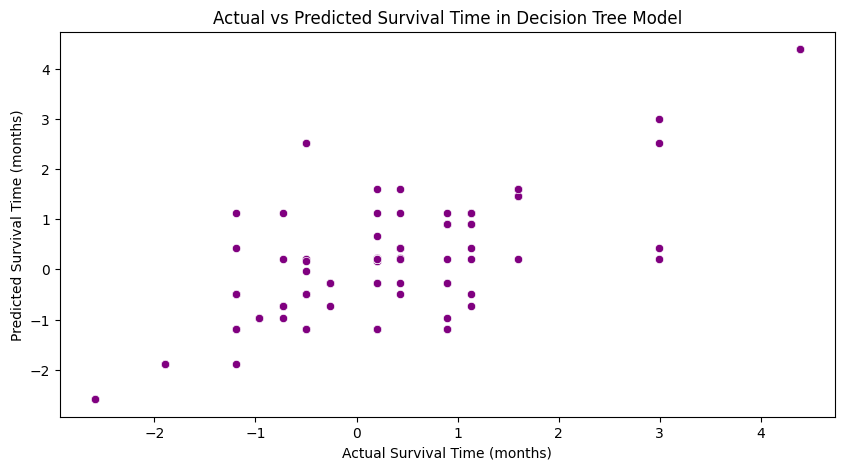

In [105]:
plt.figure(figsize=(10, 5))

sns.scatterplot(x=y_test, y=dec_tree_y_pred, color="purple")

plt.title("Actual vs Predicted Survival Time in Decision Tree Model")

plt.xlabel("Actual Survival Time (months)")
plt.ylabel("Predicted Survival Time (months)")

plt.show()

The Feature Importance Plot

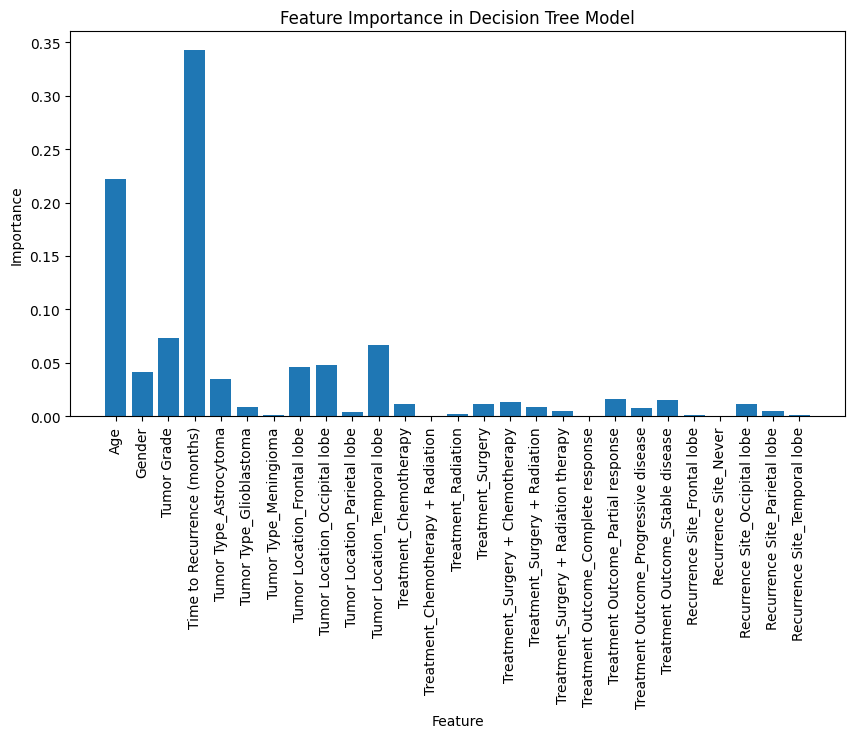

In [106]:
plt.figure(figsize=(10, 5))

plt.bar(X_train.columns, dec_tree_model.feature_importances_)
plt.xticks(rotation=90)
plt.title("Feature Importance in Decision Tree Model")
plt.xlabel("Feature")
plt.ylabel("Importance")

plt.show()

Density Plot of the Error

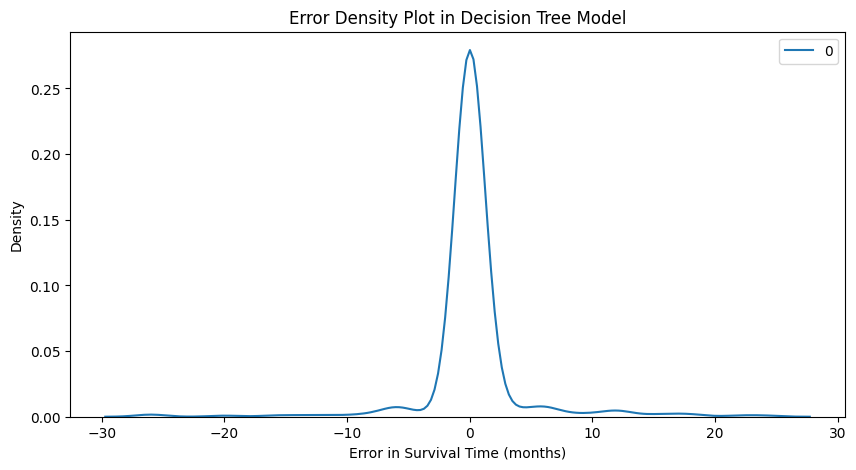

In [107]:
plt.figure(figsize=(10, 5))

sns.kdeplot(
    scaler.inverse_transform(y_test.values.reshape(-1, 1))
    - scaler.inverse_transform(dec_tree_y_pred.reshape(-1, 1))
)

plt.title("Error Density Plot in Decision Tree Model")

plt.xlabel("Error in Survival Time (months)")
plt.ylabel("Density")

plt.show()

Density Plot for `Survival Time` and **Predicted** `Survival Time` for the Test Data

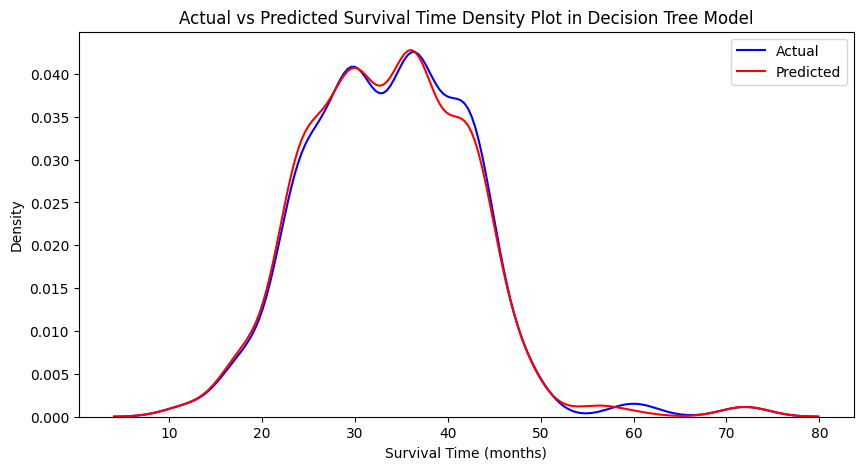

In [108]:
plt.figure(figsize=(10, 5))

sns.kdeplot(
    scaler.inverse_transform(y_test.values.reshape(-1, 1)).flatten(),
    color="blue",
    label="Actual",
)
sns.kdeplot(
    scaler.inverse_transform(dec_tree_y_pred.reshape(-1, 1)).flatten(),
    color="red",
    label="Predicted",
)

plt.title("Actual vs Predicted Survival Time Density Plot in Decision Tree Model")

plt.xlabel("Survival Time (months)")
plt.ylabel("Density")

plt.legend()

plt.show()

The Density Plot for `Survival Time` in Train and Test Actual and Predicted Data

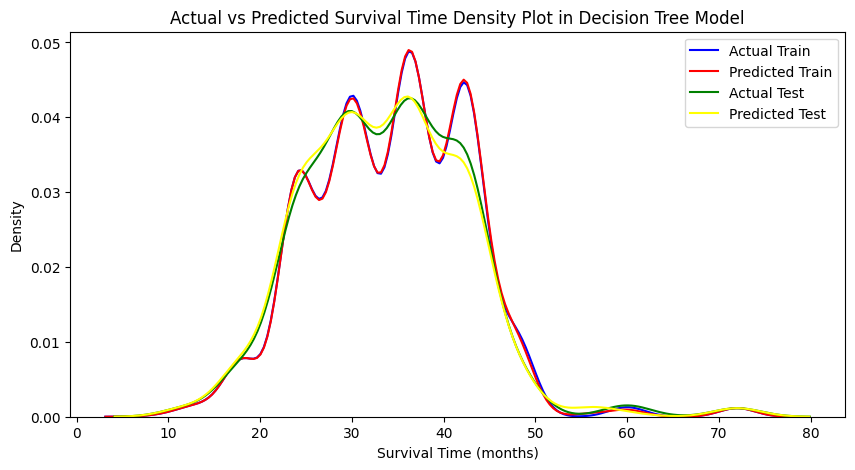

In [109]:
dec_tree_y_train_pred = dec_tree_model.predict(X_train)

plt.figure(figsize=(10, 5))

sns.kdeplot(
    scaler.inverse_transform(y_train.values.reshape(-1, 1)).flatten(),
    color="blue",
    label="Actual Train",
)
sns.kdeplot(
    scaler.inverse_transform(dec_tree_y_train_pred.reshape(-1, 1)).flatten(),
    color="red",
    label="Predicted Train",
)
sns.kdeplot(
    scaler.inverse_transform(y_test.values.reshape(-1, 1)).flatten(),
    color="green",
    label="Actual Test",
)
sns.kdeplot(
    scaler.inverse_transform(dec_tree_y_pred.reshape(-1, 1)).flatten(),
    color="yellow",
    label="Predicted Test",
)

plt.title("Actual vs Predicted Survival Time Density Plot in Decision Tree Model")

plt.xlabel("Survival Time (months)")
plt.ylabel("Density")

plt.legend()

plt.show()

# Support Vector Regression

Define the model.

In [112]:
from sklearn.svm import SVR

svr_model = SVR(
    kernel="rbf",
    degree=3,
    gamma="scale",
    coef0=0.0,
    tol=0.001,
    C=1.0,
    epsilon=0.1,
    shrinking=True,
    cache_size=200,
    verbose=False,
    max_iter=-1,
)
svr_model.fit(X_train, y_train)

SVR()

Evaluate the performance of the model.

In [113]:
svr_y_pred = svr_model.predict(X_test)

svr_mse = mean_squared_error(y_test, svr_y_pred)
print("Mean Squared Error:", svr_mse)
svr_rmse = svr_mse**0.5
print("Root Mean Squared Error:", svr_rmse)
svr_r2 = r2_score(y_test, svr_y_pred)
print("R2 Score:", svr_r2)
svr_mae = mean_absolute_error(y_test, svr_y_pred)
print("Mean Absolute Error:", svr_mae)

Mean Squared Error: 0.45073811594614166
Root Mean Squared Error: 0.6713703269776984
R2 Score: 0.562612947461836
Mean Absolute Error: 0.3802202288761428


The Scatter Plot of the Actual and Predicted `Survival Time` with the Best Fit Line.


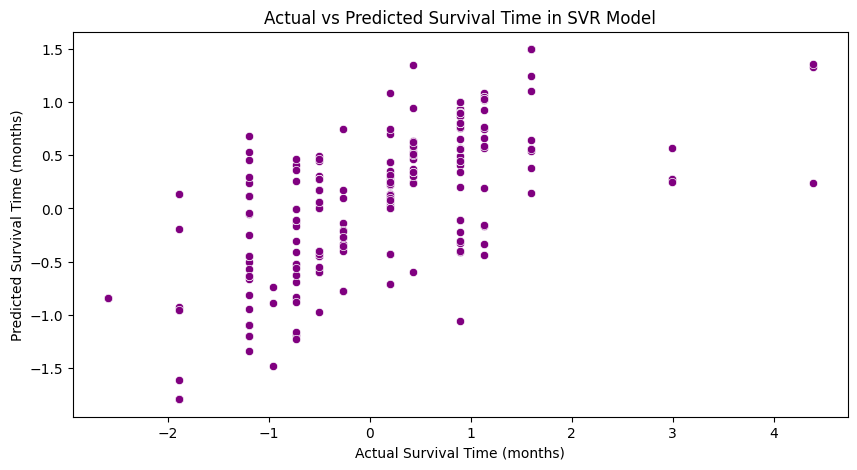

In [114]:
plt.figure(figsize=(10, 5))

sns.scatterplot(x=y_test, y=svr_y_pred, color="purple")

plt.title("Actual vs Predicted Survival Time in SVR Model")

plt.xlabel("Actual Survival Time (months)")
plt.ylabel("Predicted Survival Time (months)")

plt.show()

The Feature Importance Plot

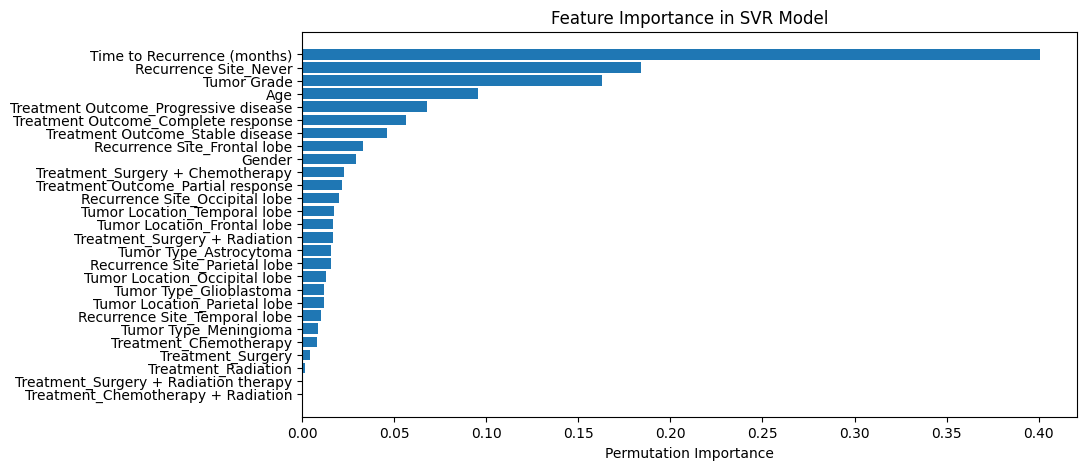

In [115]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    svr_model, X_train, y_train, n_repeats=30, random_state=42, n_jobs=-1
)

sorted_idx = result.importances_mean.argsort()

plt.figure(figsize=(10, 5))
plt.barh(range(X_train.shape[1]), result.importances_mean[sorted_idx], align="center")
plt.yticks(range(X_train.shape[1]), labels=X_train.columns[sorted_idx])
plt.xlabel("Permutation Importance")
plt.title("Feature Importance in SVR Model")
plt.show()

Density Plot of the Error

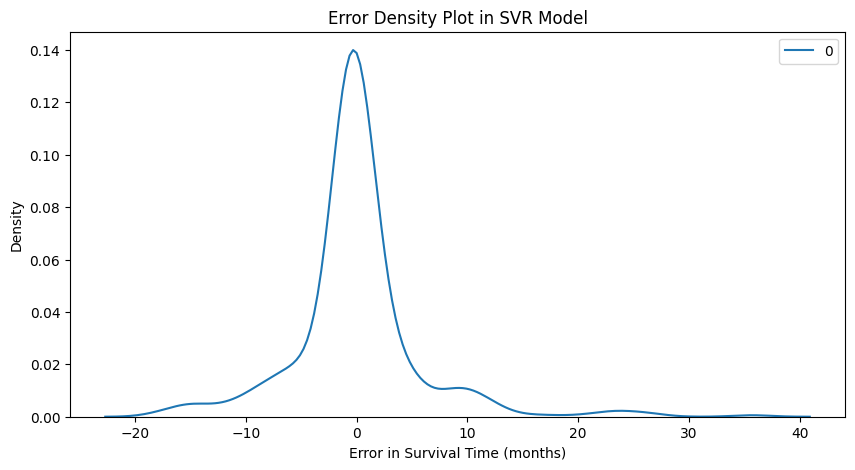

In [116]:
plt.figure(figsize=(10, 5))

sns.kdeplot(
    scaler.inverse_transform(y_test.values.reshape(-1, 1))
    - scaler.inverse_transform(svr_y_pred.reshape(-1, 1))
)

plt.title("Error Density Plot in SVR Model")

plt.xlabel("Error in Survival Time (months)")
plt.ylabel("Density")

plt.show()

Density Plot for `Survival Time` and **Predicted** `Survival Time` for the Test Data

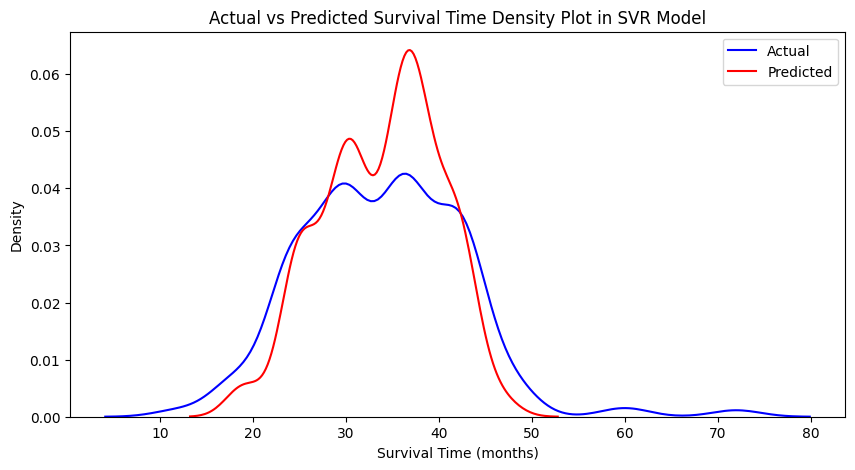

In [117]:
plt.figure(figsize=(10, 5))

sns.kdeplot(
    scaler.inverse_transform(y_test.values.reshape(-1, 1)).flatten(),
    color="blue",
    label="Actual",
)
sns.kdeplot(
    scaler.inverse_transform(svr_y_pred.reshape(-1, 1)).flatten(),
    color="red",
    label="Predicted",
)

plt.title("Actual vs Predicted Survival Time Density Plot in SVR Model")

plt.xlabel("Survival Time (months)")
plt.ylabel("Density")

plt.legend()

plt.show()

The Density Plot for `Survival Time` in Train and Test Actual and Predicted Data

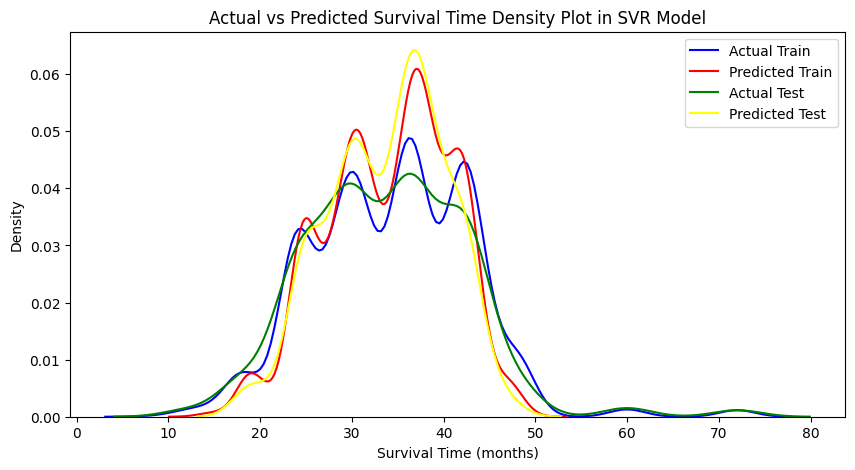

In [118]:
svr_y_train_pred = svr_model.predict(X_train)

plt.figure(figsize=(10, 5))

sns.kdeplot(
    scaler.inverse_transform(y_train.values.reshape(-1, 1)).flatten(),
    color="blue",
    label="Actual Train",
)
sns.kdeplot(
    scaler.inverse_transform(svr_y_train_pred.reshape(-1, 1)).flatten(),
    color="red",
    label="Predicted Train",
)
sns.kdeplot(
    scaler.inverse_transform(y_test.values.reshape(-1, 1)).flatten(),
    color="green",
    label="Actual Test",
)
sns.kdeplot(
    scaler.inverse_transform(svr_y_pred.reshape(-1, 1)).flatten(),
    color="yellow",
    label="Predicted Test",
)

plt.title("Actual vs Predicted Survival Time Density Plot in SVR Model")

plt.xlabel("Survival Time (months)")
plt.ylabel("Density")

plt.legend()

plt.show()

# Random Forest

Define the model.

In [119]:
from sklearn.ensemble import RandomForestRegressor

rand_for_model = RandomForestRegressor(
    n_estimators=100,
    criterion="squared_error",
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
)
rand_for_model.fit(X_train, y_train)

RandomForestRegressor()

Evaluate the Performance of the Model.

In [120]:
rand_for_y_pred = rand_for_model.predict(X_test)

rand_for_mse = mean_squared_error(y_test, rand_for_y_pred)
print("Mean Squared Error:", rand_for_mse)
rand_for_rmse = rand_for_mse**0.5
print("Root Mean Squared Error:", rand_for_rmse)
rand_for_r2 = r2_score(y_test, rand_for_y_pred)
print("R2 Score:", rand_for_r2)
rand_for_mae = mean_absolute_error(y_test, rand_for_y_pred)
print("Mean Absolute Error:", rand_for_mae)

Mean Squared Error: 0.17701218952008943
Root Mean Squared Error: 0.4207281658269261
R2 Score: 0.8282309902391969
Mean Absolute Error: 0.17096030359586567


The Scatter Plot of the Actual and Predicted `Survival Time` with the Best Fit Line.


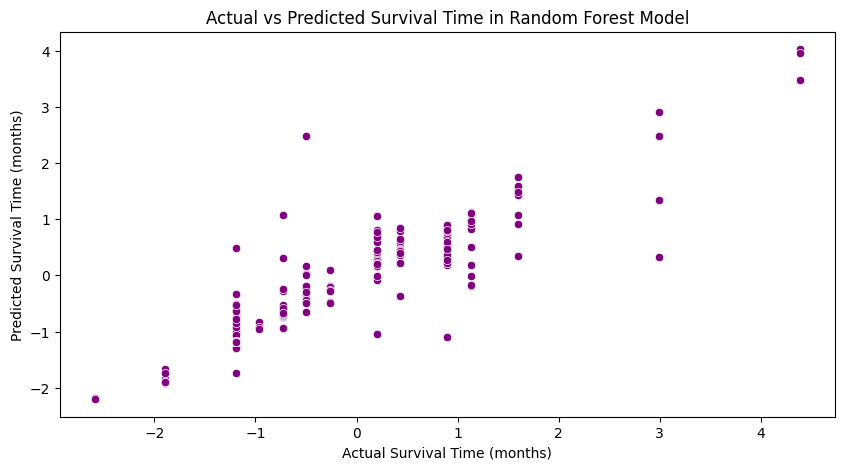

In [121]:
plt.figure(figsize=(10, 5))

sns.scatterplot(x=y_test, y=rand_for_y_pred, color="purple")

plt.title("Actual vs Predicted Survival Time in Random Forest Model")

plt.xlabel("Actual Survival Time (months)")
plt.ylabel("Predicted Survival Time (months)")

plt.show()

The Feature Importance Plot

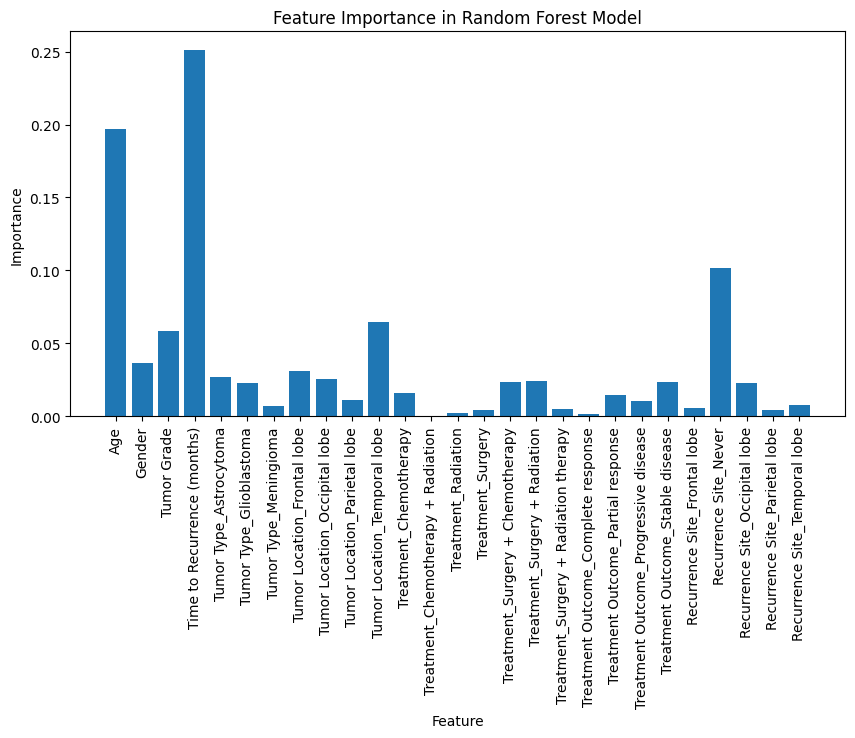

In [122]:
plt.figure(figsize=(10, 5))

plt.bar(X_train.columns, rand_for_model.feature_importances_)
plt.xticks(rotation=90)
plt.title("Feature Importance in Random Forest Model")
plt.xlabel("Feature")
plt.ylabel("Importance")

plt.show()

Density Plot of the Error

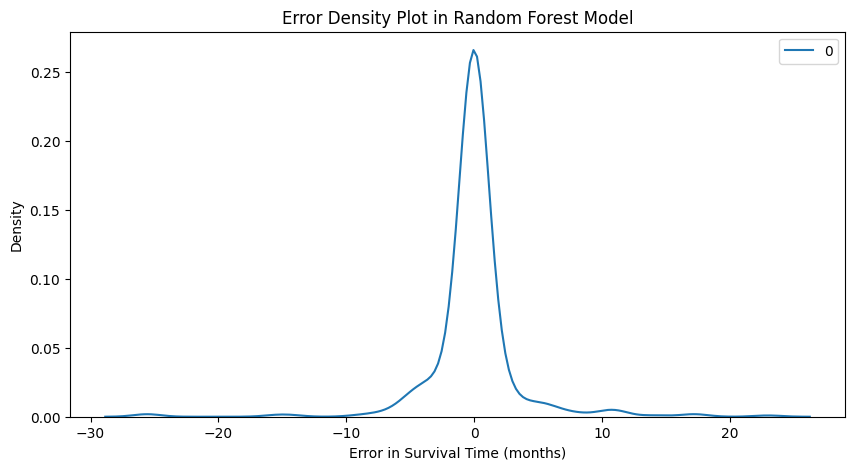

In [123]:
plt.figure(figsize=(10, 5))

sns.kdeplot(
    scaler.inverse_transform(y_test.values.reshape(-1, 1))
    - scaler.inverse_transform(rand_for_y_pred.reshape(-1, 1))
)

plt.title("Error Density Plot in Random Forest Model")

plt.xlabel("Error in Survival Time (months)")
plt.ylabel("Density")

plt.show()

Density Plot for `Survival Time` and **Predicted** `Survival Time` for the Test Data

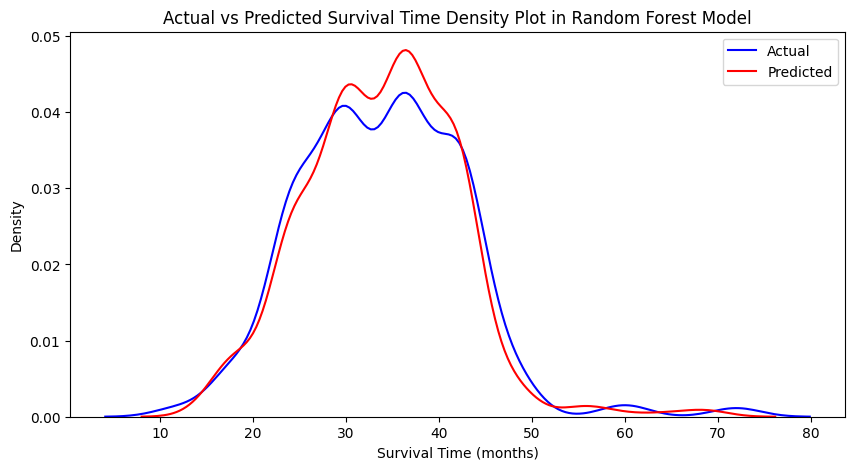

In [124]:
plt.figure(figsize=(10, 5))

sns.kdeplot(
    scaler.inverse_transform(y_test.values.reshape(-1, 1)).flatten(),
    color="blue",
    label="Actual",
)
sns.kdeplot(
    scaler.inverse_transform(rand_for_y_pred.reshape(-1, 1)).flatten(),
    color="red",
    label="Predicted",
)

plt.title("Actual vs Predicted Survival Time Density Plot in Random Forest Model")

plt.xlabel("Survival Time (months)")
plt.ylabel("Density")

plt.legend()

plt.show()

The Density Plot for `Survival Time` in Train and Test Actual and Predicted Data

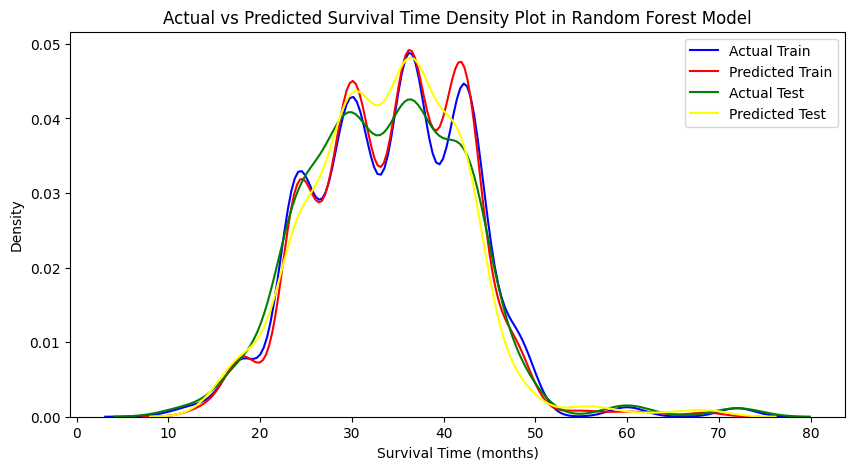

In [125]:
rand_for_y_train_pred = rand_for_model.predict(X_train)

plt.figure(figsize=(10, 5))

sns.kdeplot(
    scaler.inverse_transform(y_train.values.reshape(-1, 1)).flatten(),
    color="blue",
    label="Actual Train",
)
sns.kdeplot(
    scaler.inverse_transform(rand_for_y_train_pred.reshape(-1, 1)).flatten(),
    color="red",
    label="Predicted Train",
)
sns.kdeplot(
    scaler.inverse_transform(y_test.values.reshape(-1, 1)).flatten(),
    color="green",
    label="Actual Test",
)
sns.kdeplot(
    scaler.inverse_transform(rand_for_y_pred.reshape(-1, 1)).flatten(),
    color="yellow",
    label="Predicted Test",
)

plt.title("Actual vs Predicted Survival Time Density Plot in Random Forest Model")

plt.xlabel("Survival Time (months)")
plt.ylabel("Density")

plt.legend()

plt.show()

# Gradient Boosting

Define the model.

In [128]:
from sklearn.ensemble import GradientBoostingRegressor

grad_boost_model = GradientBoostingRegressor(
    n_estimators=100,
    criterion="squared_error",
    max_depth=3,
    min_samples_split=2,
    min_samples_leaf=1,
)
grad_boost_model.fit(X_train, y_train)

GradientBoostingRegressor(criterion='squared_error')

Evaluate the performance of the model.

In [129]:
grad_boost_y_pred = grad_boost_model.predict(X_test)

grad_boost_mse = mean_squared_error(y_test, grad_boost_y_pred)
print("Mean Squared Error:", grad_boost_mse)
grad_boost_rmse = grad_boost_mse**0.5
print("Root Mean Squared Error:", grad_boost_rmse)
grad_boost_r2 = r2_score(y_test, grad_boost_y_pred)
print("R2 Score:", grad_boost_r2)
grad_boost_mae = mean_absolute_error(y_test, grad_boost_y_pred)
print("Mean Absolute Error:", grad_boost_mae)

Mean Squared Error: 0.39047424908696504
Root Mean Squared Error: 0.6248793876316974
R2 Score: 0.621091771789258
Mean Absolute Error: 0.420562680761752


The Scatter Plot of the Actual and Predicted `Survival Time` with the Best Fit Line.

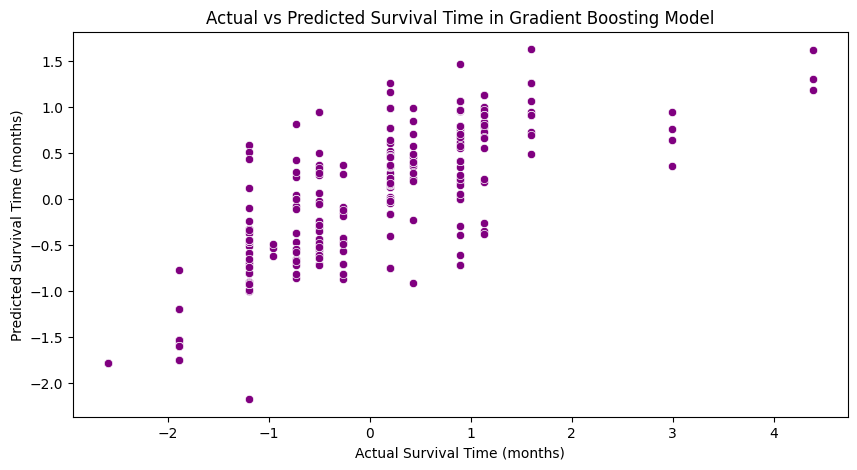

In [131]:
plt.figure(figsize=(10, 5))

sns.scatterplot(x=y_test, y=grad_boost_y_pred, color="purple")

plt.title("Actual vs Predicted Survival Time in Gradient Boosting Model")

plt.xlabel("Actual Survival Time (months)")
plt.ylabel("Predicted Survival Time (months)")

plt.show()

The Feature Importance Plot

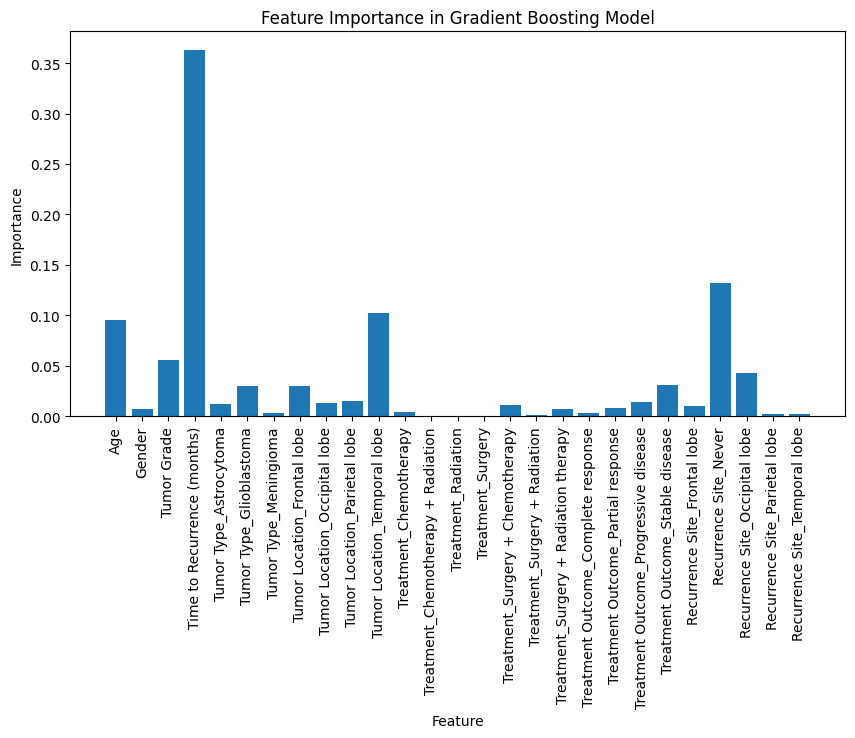

In [132]:
plt.figure(figsize=(10, 5))

plt.bar(X_train.columns, grad_boost_model.feature_importances_)
plt.xticks(rotation=90)
plt.title("Feature Importance in Gradient Boosting Model")
plt.xlabel("Feature")
plt.ylabel("Importance")

plt.show()

Density Plot of the Error

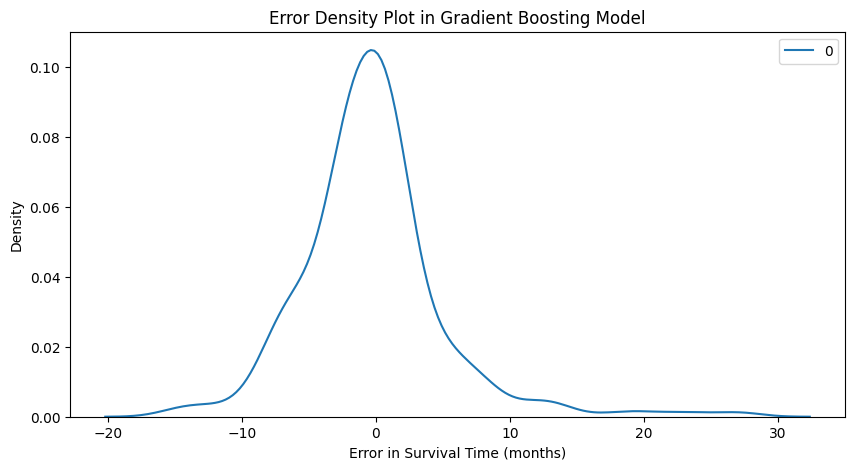

In [133]:
plt.figure(figsize=(10, 5))

sns.kdeplot(
    scaler.inverse_transform(y_test.values.reshape(-1, 1))
    - scaler.inverse_transform(grad_boost_y_pred.reshape(-1, 1))
)

plt.title("Error Density Plot in Gradient Boosting Model")

plt.xlabel("Error in Survival Time (months)")
plt.ylabel("Density")

plt.show()

Density Plot for `Survival Time` and **Predicted** `Survival Time` for the Test Data

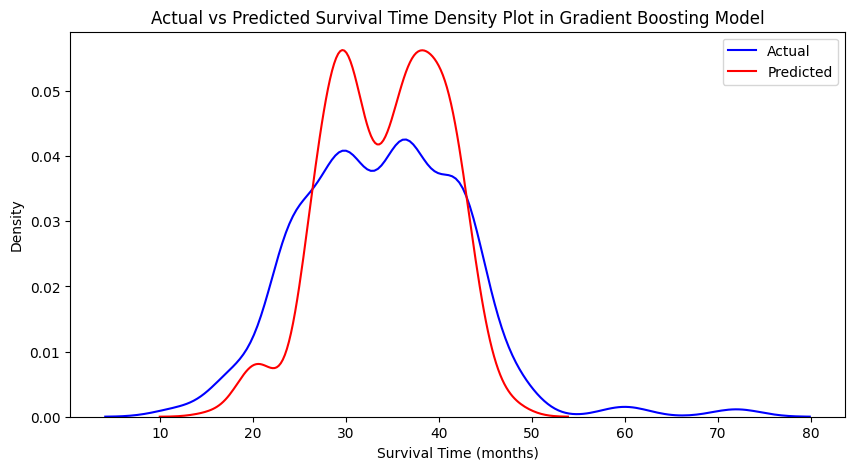

In [116]:
plt.figure(figsize=(10, 5))

sns.kdeplot(
    scaler.inverse_transform(y_test.values.reshape(-1, 1)).flatten(),
    color="blue",
    label="Actual",
)
sns.kdeplot(
    scaler.inverse_transform(grad_boost_y_pred.reshape(-1, 1)).flatten(),
    color="red",
    label="Predicted",
)

plt.title("Actual vs Predicted Survival Time Density Plot in Gradient Boosting Model")

plt.xlabel("Survival Time (months)")
plt.ylabel("Density")

plt.legend()

plt.show()

The Density Plot for `Survival Time` in Train and Test Actual and Predicted Data

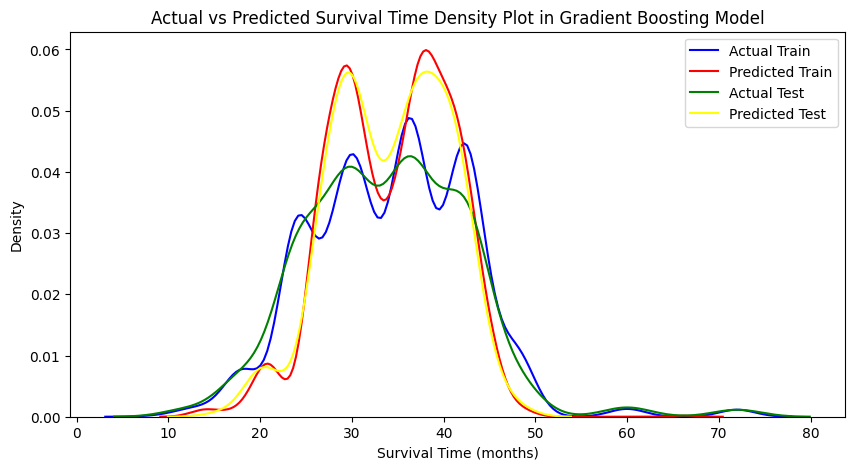

In [134]:
grad_boost_y_train_pred = grad_boost_model.predict(X_train)

plt.figure(figsize=(10, 5))

sns.kdeplot(
    scaler.inverse_transform(y_train.values.reshape(-1, 1)).flatten(),
    color="blue",
    label="Actual Train",
)
sns.kdeplot(
    scaler.inverse_transform(grad_boost_y_train_pred.reshape(-1, 1)).flatten(),
    color="red",
    label="Predicted Train",
)
sns.kdeplot(
    scaler.inverse_transform(y_test.values.reshape(-1, 1)).flatten(),
    color="green",
    label="Actual Test",
)
sns.kdeplot(
    scaler.inverse_transform(grad_boost_y_pred.reshape(-1, 1)).flatten(),
    color="yellow",
    label="Predicted Test",
)

plt.title("Actual vs Predicted Survival Time Density Plot in Gradient Boosting Model")

plt.xlabel("Survival Time (months)")
plt.ylabel("Density")

plt.legend()

plt.show()

# Multi-Layer Perceptron

Define the model.

In [135]:
from sklearn.neural_network import MLPRegressor

mlp_model = MLPRegressor(
    hidden_layer_sizes=(80,),
    activation="relu",
    solver="adam",
    alpha=0.0001,
    batch_size="auto",
    learning_rate="constant",
    learning_rate_init=0.001,
    power_t=0.5,
    max_iter=4000,
    shuffle=True,
    random_state=None,
    tol=0.0001,
    verbose=False,
    warm_start=False,
    momentum=0.9,
    nesterovs_momentum=True,
    early_stopping=False,
    validation_fraction=0.1,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-08,
    n_iter_no_change=10,
    max_fun=15000,
)
mlp_model.fit(X_train, y_train)

MLPRegressor(hidden_layer_sizes=(80,), max_iter=4000)

Evaluate the performance of the model.

In [136]:
mlp_y_pred = mlp_model.predict(X_test)

mlp_mse = mean_squared_error(y_test, mlp_y_pred)
print("Mean Squared Error:", mlp_mse)
mlp_rmse = mlp_mse**0.5
print("Root Mean Squared Error:", mlp_rmse)
mlp_r2 = r2_score(y_test, mlp_y_pred)
print("R2 Score:", mlp_r2)
mlp_mae = mean_absolute_error(y_test, mlp_y_pred)
print("Mean Absolute Error:", mlp_mae)

Mean Squared Error: 0.26736923499485543
Root Mean Squared Error: 0.5170775908844392
R2 Score: 0.7405503606272403
Mean Absolute Error: 0.26667148853475153


The Scatter Plot of the Actual and Predicted `Survival Time` with the Best Fit Line.


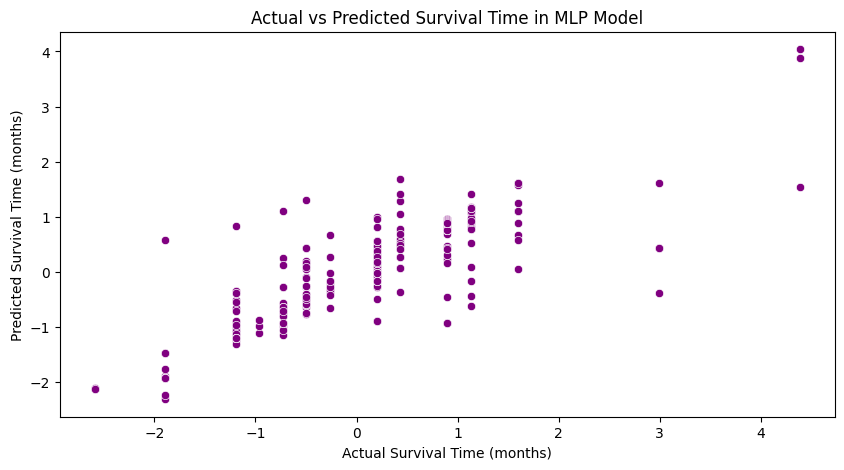

In [137]:
plt.figure(figsize=(10, 5))

sns.scatterplot(x=y_test, y=mlp_y_pred, color="purple")

plt.title("Actual vs Predicted Survival Time in MLP Model")

plt.xlabel("Actual Survival Time (months)")
plt.ylabel("Predicted Survival Time (months)")

plt.show()

The Feature Coefficients Plot

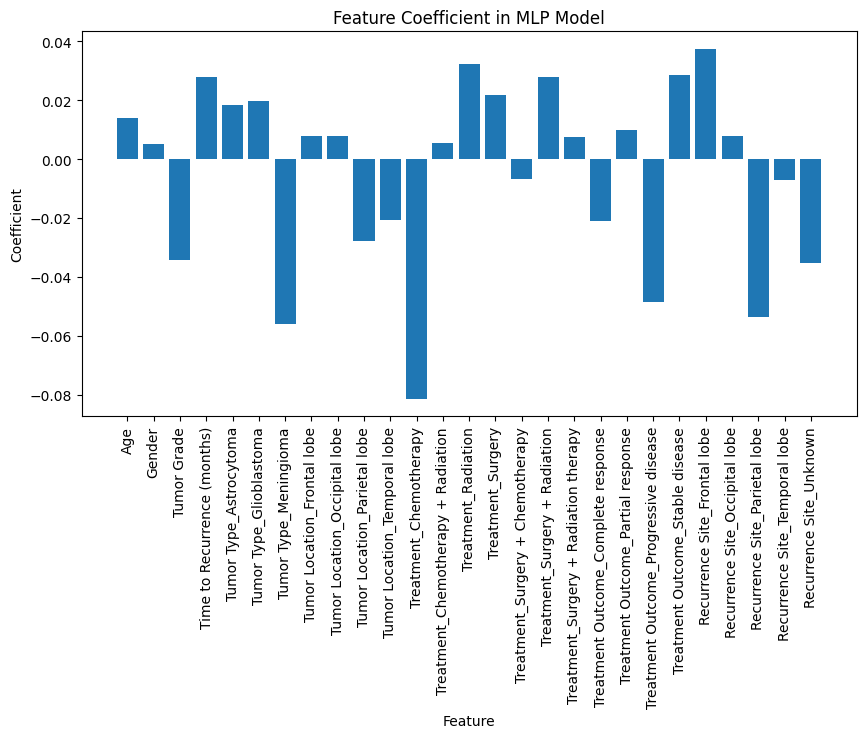

In [121]:
plt.figure(figsize=(10, 5))

plt.bar(X_train.columns, mlp_model.coefs_[0].mean(axis=1))
plt.xticks(rotation=90)
plt.title("Feature Coefficient in MLP Model")
plt.xlabel("Feature")
plt.ylabel("Coefficient")

plt.show()

Density Plot of the Error

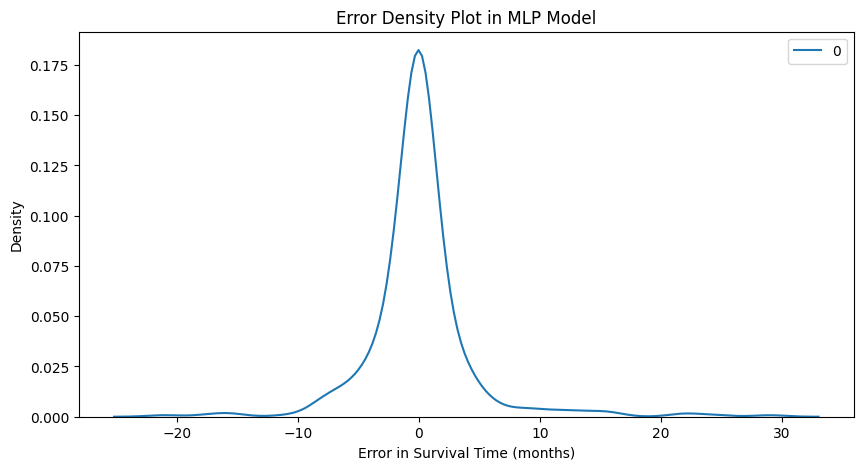

In [138]:
plt.figure(figsize=(10, 5))

sns.kdeplot(
    scaler.inverse_transform(y_test.values.reshape(-1, 1))
    - scaler.inverse_transform(mlp_y_pred.reshape(-1, 1))
)

plt.title("Error Density Plot in MLP Model")

plt.xlabel("Error in Survival Time (months)")
plt.ylabel("Density")

plt.show()

Density Plot for `Survival Time` and **Predicted** `Survival Time` for the Test Data

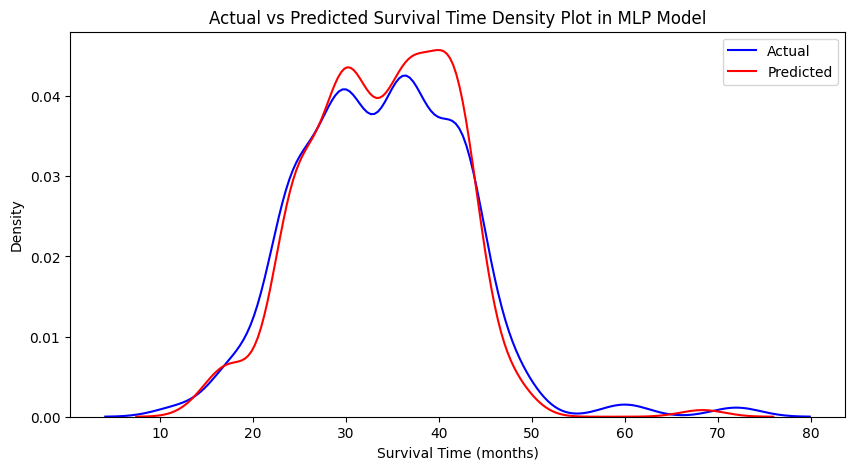

In [139]:
plt.figure(figsize=(10, 5))

sns.kdeplot(
    scaler.inverse_transform(y_test.values.reshape(-1, 1)).flatten(),
    color="blue",
    label="Actual",
)
sns.kdeplot(
    scaler.inverse_transform(mlp_y_pred.reshape(-1, 1)).flatten(),
    color="red",
    label="Predicted",
)

plt.title("Actual vs Predicted Survival Time Density Plot in MLP Model")

plt.xlabel("Survival Time (months)")
plt.ylabel("Density")

plt.legend()

plt.show()

The Density Plot for `Survival Time` in Train and Test Actual and Predicted Data

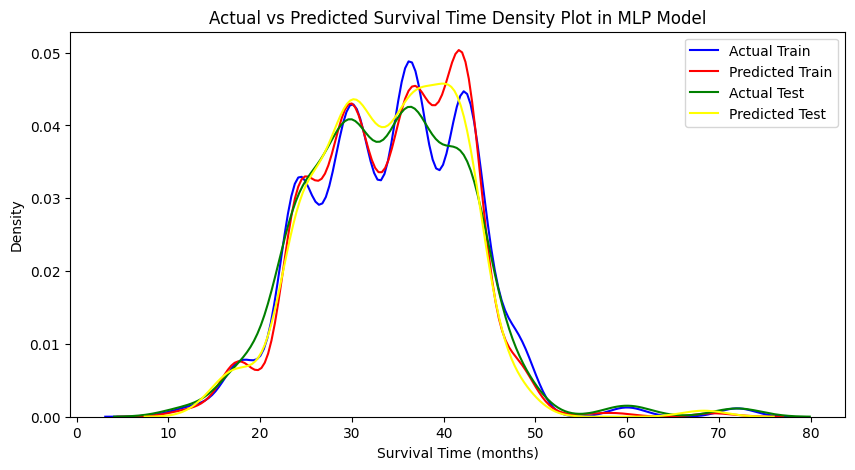

In [140]:
mlp_y_train_pred = mlp_model.predict(X_train)

plt.figure(figsize=(10, 5))

sns.kdeplot(
    scaler.inverse_transform(y_train.values.reshape(-1, 1)).flatten(),
    color="blue",
    label="Actual Train",
)
sns.kdeplot(
    scaler.inverse_transform(mlp_y_train_pred.reshape(-1, 1)).flatten(),
    color="red",
    label="Predicted Train",
)
sns.kdeplot(
    scaler.inverse_transform(y_test.values.reshape(-1, 1)).flatten(),
    color="green",
    label="Actual Test",
)
sns.kdeplot(
    scaler.inverse_transform(mlp_y_pred.reshape(-1, 1)).flatten(),
    color="yellow",
    label="Predicted Test",
)

plt.title("Actual vs Predicted Survival Time Density Plot in MLP Model")

plt.xlabel("Survival Time (months)")
plt.ylabel("Density")

plt.legend()

plt.show()

# K-Nearest Neighbors

Define the model.

In [141]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor(
    n_neighbors=5,
    weights="uniform",
    algorithm="auto",
    leaf_size=30,
    p=2,
    metric="minkowski",
    metric_params=None,
    n_jobs=None,
)
knn_model.fit(X_train, y_train)

KNeighborsRegressor()

Evaluate the performance of the model.

In [142]:
knn_y_pred = knn_model.predict(X_test)

knn_mse = mean_squared_error(y_test, knn_y_pred)
print("Mean Squared Error:", knn_mse)
knn_rmse = knn_mse**0.5
print("Root Mean Squared Error:", knn_rmse)
knn_r2 = r2_score(y_test, knn_y_pred)
print("R2 Score:", knn_r2)
knn_mae = mean_absolute_error(y_test, knn_y_pred)
print("Mean Absolute Error:", knn_mae)

Mean Squared Error: 0.3069992611313201
Root Mean Squared Error: 0.5540751403296489
R2 Score: 0.7020941934858091
Mean Absolute Error: 0.27823650645342


The Scatter Plot of the Actual and Predicted `Survival Time` with the Best Fit Line

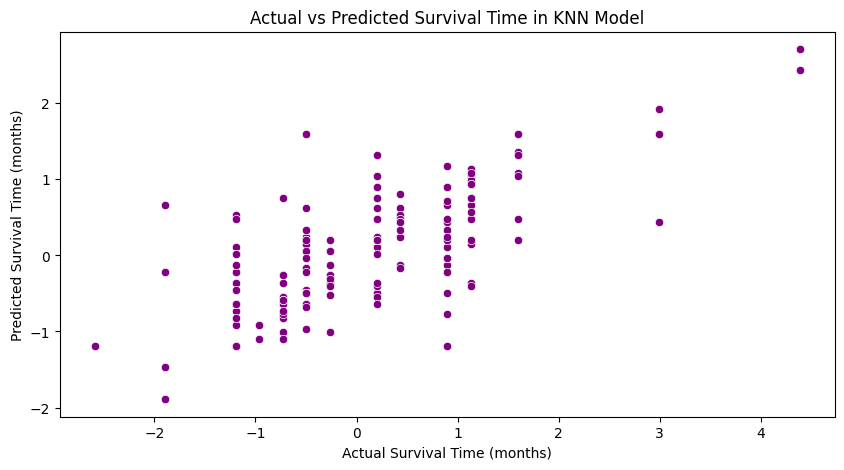

In [143]:
plt.figure(figsize=(10, 5))

sns.scatterplot(x=y_test, y=knn_y_pred, color="purple")

plt.title("Actual vs Predicted Survival Time in KNN Model")

plt.xlabel("Actual Survival Time (months)")
plt.ylabel("Predicted Survival Time (months)")

plt.show()

Density Plot of the Error

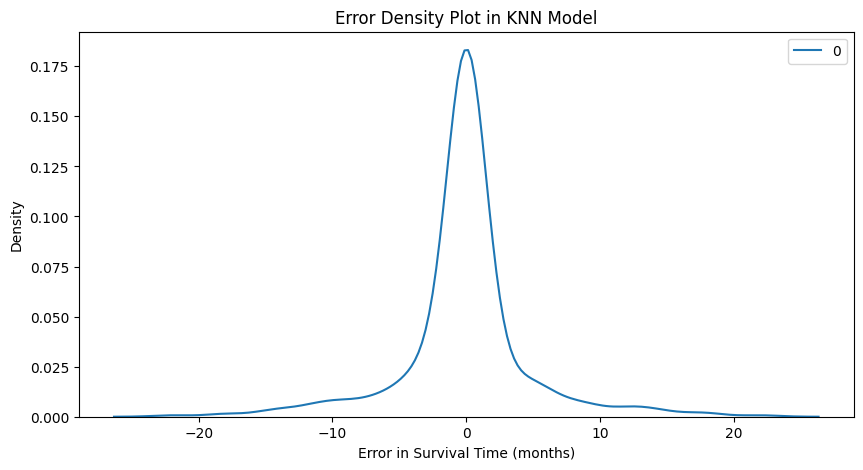

In [144]:
plt.figure(figsize=(10, 5))

sns.kdeplot(
    scaler.inverse_transform(y_test.values.reshape(-1, 1))
    - scaler.inverse_transform(knn_y_pred.reshape(-1, 1))
)

plt.title("Error Density Plot in KNN Model")

plt.xlabel("Error in Survival Time (months)")
plt.ylabel("Density")

plt.show()

Density Plot for `Survival Time` and **Predicted** `Survival Time` for the Test Data

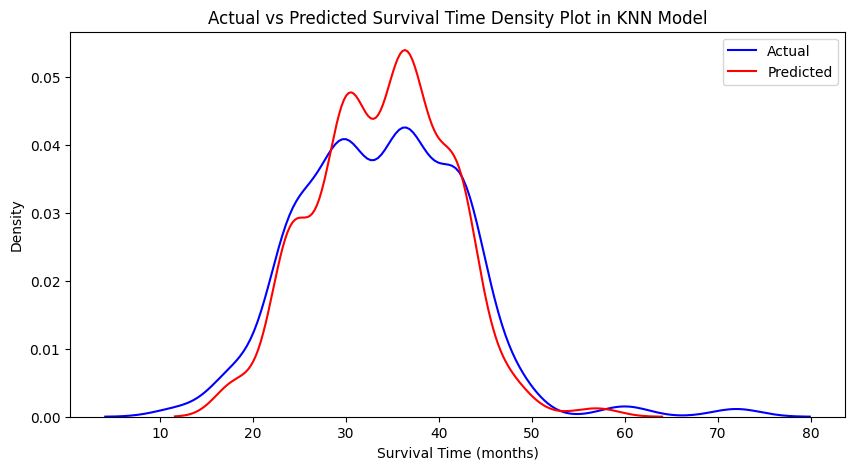

In [145]:
plt.figure(figsize=(10, 5))

sns.kdeplot(
    scaler.inverse_transform(y_test.values.reshape(-1, 1)).flatten(),
    color="blue",
    label="Actual",
)
sns.kdeplot(
    scaler.inverse_transform(knn_y_pred.reshape(-1, 1)).flatten(),
    color="red",
    label="Predicted",
)

plt.title("Actual vs Predicted Survival Time Density Plot in KNN Model")

plt.xlabel("Survival Time (months)")
plt.ylabel("Density")

plt.legend()

plt.show()

The Density Plot for `Survival Time` in Train and Test Actual and Predicted Data

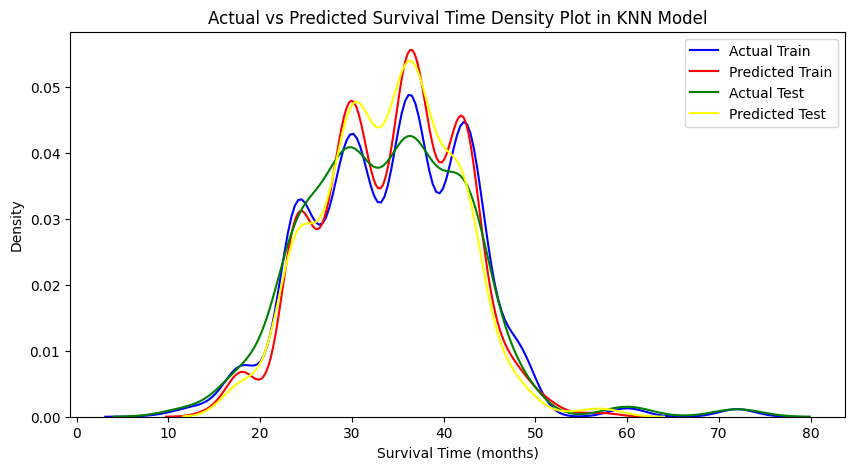

In [146]:
knn_y_train_pred = knn_model.predict(X_train)

plt.figure(figsize=(10, 5))

sns.kdeplot(
    scaler.inverse_transform(y_train.values.reshape(-1, 1)).flatten(),
    color="blue",
    label="Actual Train",
)
sns.kdeplot(
    scaler.inverse_transform(knn_y_train_pred.reshape(-1, 1)).flatten(),
    color="red",
    label="Predicted Train",
)
sns.kdeplot(
    scaler.inverse_transform(y_test.values.reshape(-1, 1)).flatten(),
    color="green",
    label="Actual Test",
)
sns.kdeplot(
    scaler.inverse_transform(knn_y_pred.reshape(-1, 1)).flatten(),
    color="yellow",
    label="Predicted Test",
)

plt.title("Actual vs Predicted Survival Time Density Plot in KNN Model")

plt.xlabel("Survival Time (months)")
plt.ylabel("Density")

plt.legend()

plt.show()

# Comparison

In [162]:
model_names = [
    "Linear Regression",
    "Decision Tree",
    "SVR",
    "Random Forest",
    "Gradient Boosting",
    "MLP",
    "KNN",
]

model_mses = [
    lin_reg_mse,
    dec_tree_mse,
    svr_mse,
    rand_for_mse,
    grad_boost_mse,
    mlp_mse,
    knn_mse,
]

model_rmses = [
    lin_reg_rmse,
    dec_tree_rmse,
    svr_rmse,
    rand_for_rmse,
    grad_boost_rmse,
    mlp_rmse,
    knn_rmse,
]

model_r2s = [lin_reg_r2, dec_tree_r2, svr_r2, rand_for_r2, grad_boost_r2, mlp_r2, knn_r2]

model_maes = [lin_reg_mae, dec_tree_mae, svr_mae, rand_for_mae, grad_boost_mae, mlp_mae, knn_mae]


Mean Squared Error Comparison

C:\Users\adrin\AppData\Local\Temp\ipykernel_22488\1308131053.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=model_mses, palette="Blues")


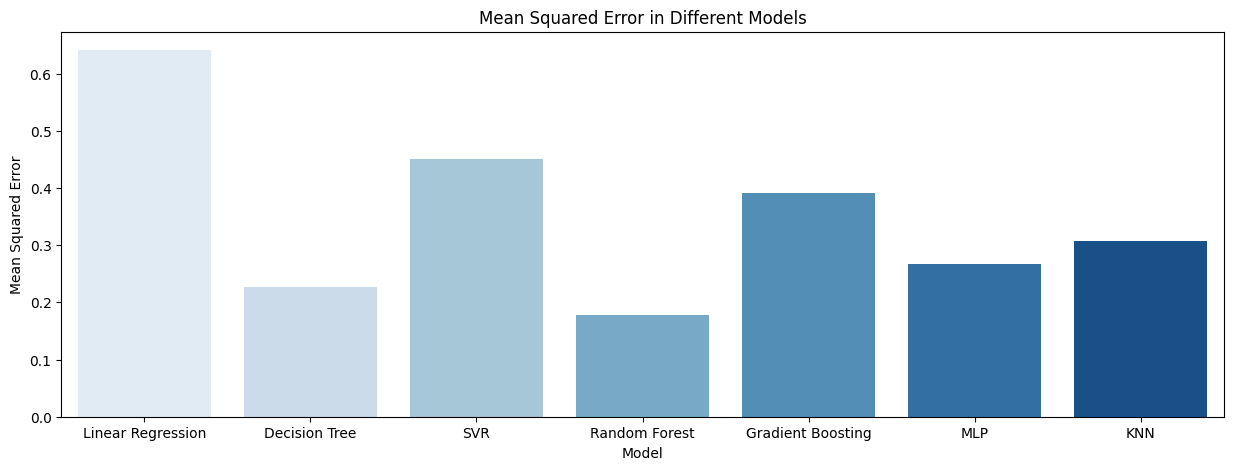

In [163]:
plt.figure(figsize=(15, 5))

sns.barplot(x=model_names, y=model_mses, palette="Blues")
plt.title("Mean Squared Error in Different Models")
plt.xlabel("Model")
plt.ylabel("Mean Squared Error")

plt.show()

Root Mean Squared Error Comparison

C:\Users\adrin\AppData\Local\Temp\ipykernel_22488\2782092806.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=model_rmses, palette="Blues")


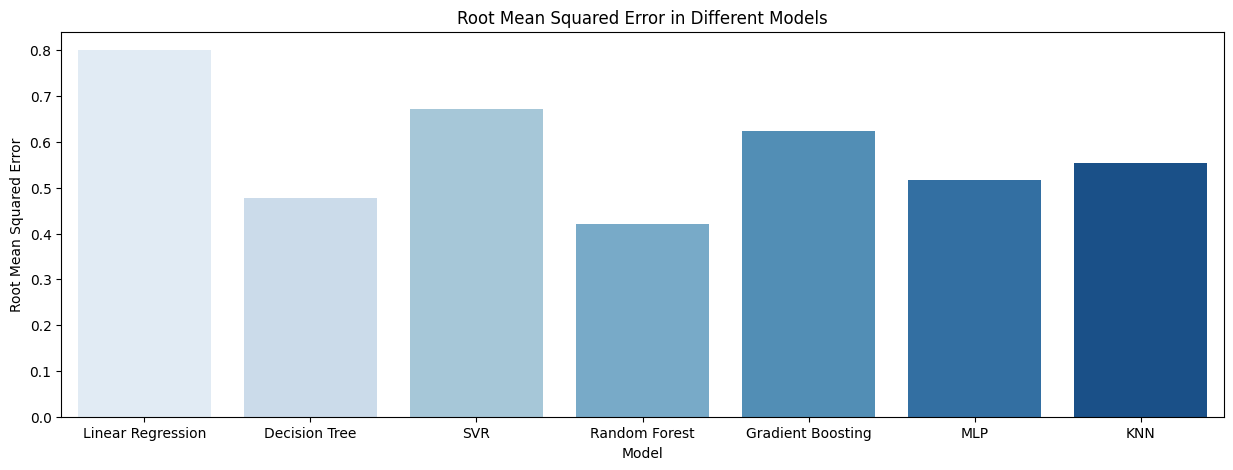

In [164]:
plt.figure(figsize=(15, 5))

sns.barplot(x=model_names, y=model_rmses, palette="Blues")

plt.title("Root Mean Squared Error in Different Models")
plt.xlabel("Model")
plt.ylabel("Root Mean Squared Error")

plt.show()

R2 Score Comparison

C:\Users\adrin\AppData\Local\Temp\ipykernel_22488\165464911.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=model_r2s, palette="Blues")


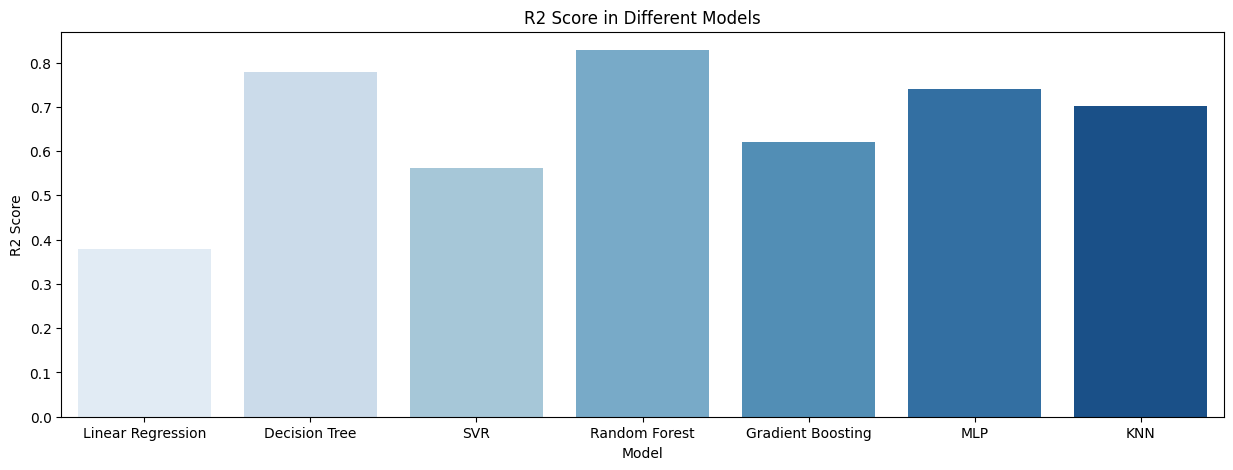

In [165]:
plt.figure(figsize=(15, 5))

sns.barplot(x=model_names, y=model_r2s, palette="Blues")

plt.title("R2 Score in Different Models")
plt.xlabel("Model")
plt.ylabel("R2 Score")

plt.show()

Mean Absolute Error Comparison

C:\Users\adrin\AppData\Local\Temp\ipykernel_22488\1214725496.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=model_maes, palette="Blues")


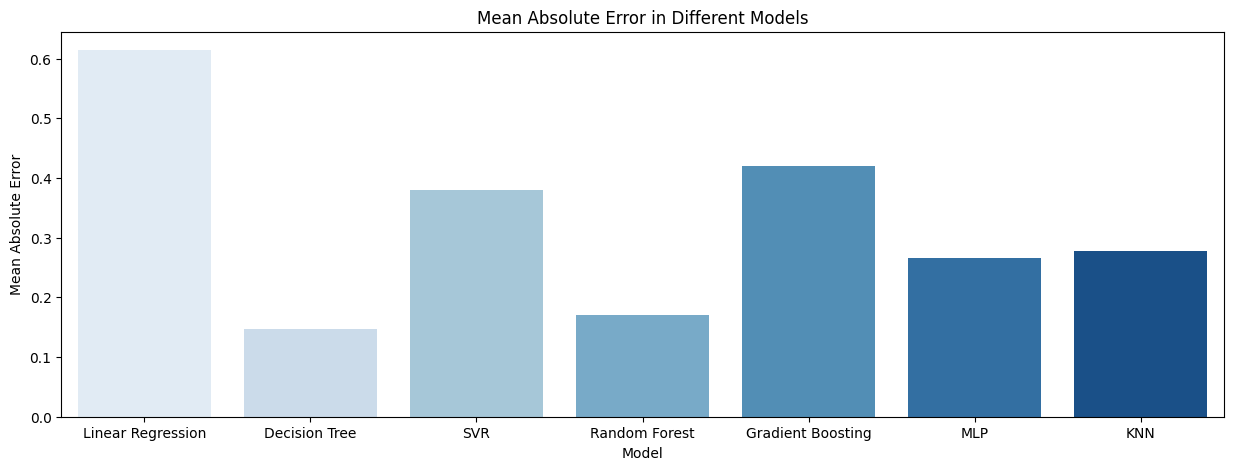

In [166]:
plt.figure(figsize=(15, 5))

sns.barplot(x=model_names, y=model_maes, palette="Blues")

plt.title("Mean Absolute Error in Different Models")
plt.xlabel("Model")
plt.ylabel("Mean Absolute Error")

plt.show()